## AMP®-Parkinson's Disease Progression Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import warnings
warnings.filterwarnings('ignore')

train_clinical_data = pd.read_csv("data/train/train_clinical_data.csv")
train_peptides = pd.read_csv("data/train/train_peptides.csv")
train_protiens = pd.read_csv("data/train/train_proteins.csv")
supplemental_clinical_data = pd.read_csv("data/train/supplemental_clinical_data.csv")

In [2]:
train_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [3]:
train_clinical_data.shape

(2615, 8)

In [4]:
train_clinical_data.info

<bound method DataFrame.info of       visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      NaN   
1         55_3          55            3     10.0      7.0     25.0      NaN   
2         55_6          55            6      8.0     10.0     34.0      NaN   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
2610  65043_48       65043           48      7.0      6.0     13.0      0.0   
2611  65043_54       65043           54      4.0      8.0     11.0      1.0   
2612  65043_60       65043           60      6.0      6.0     16.0      1.0   
2613  65043_72       65043           72      3.0      9.0     14.0      1.0   
2614  65043_84       65043           84      7.0      9.0     20.0      3.0   

     upd23b_clinica

In [5]:
print(": Found {:,d} unique patient_id values".format(train_clinical_data["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(train_clinical_data["visit_month"].nunique()))

: Found 248 unique patient_id values
: Found 17 unique visit_month values


In [6]:
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [7]:
print(": Found {:,d} unique patient_id values".format(train_peptides["patient_id"].nunique()))      ## 248
print(": Found {:,d} unique visit_month values".format(train_peptides["visit_month"].nunique()))    ## 15
print(": Found {:,d} unique UniProt values".format(train_peptides["UniProt"].nunique()))            ## 227
print(": Found {:,d} unique Peptide values".format(train_peptides["Peptide"].nunique()))            ## 968

: Found 248 unique patient_id values
: Found 15 unique visit_month values
: Found 227 unique UniProt values
: Found 968 unique Peptide values


In [ ]:
train_protiens

In [8]:
print(": Found {:,d} unique patient_id values".format(train_protiens["patient_id"].nunique()))    ## 248
print(": Found {:,d} unique visit_month values".format(train_protiens["visit_month"].nunique()))  ## 15
print(": Found {:,d} unique UniProt values".format(train_protiens["UniProt"].nunique()))          ## 227
print(": Found {:,d} unique NPX values".format(train_protiens["NPX"].nunique()))                  ## 218,795

: Found 248 unique patient_id values
: Found 15 unique visit_month values
: Found 227 unique UniProt values
: Found 218,795 unique NPX values


In [9]:
supplemental_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [10]:
print(": Found {:,d} unique patient_id values".format(supplemental_clinical_data["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(supplemental_clinical_data["visit_month"].nunique()))

: Found 771 unique patient_id values
: Found 8 unique visit_month values


In [11]:
combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)
combined

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
4833,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
4834,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
4835,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
4836,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [12]:
print(": Found {:,d} unique patient_id values".format(combined["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(combined["visit_month"].nunique()))

: Found 1,019 unique patient_id values
: Found 18 unique visit_month values


### Null values

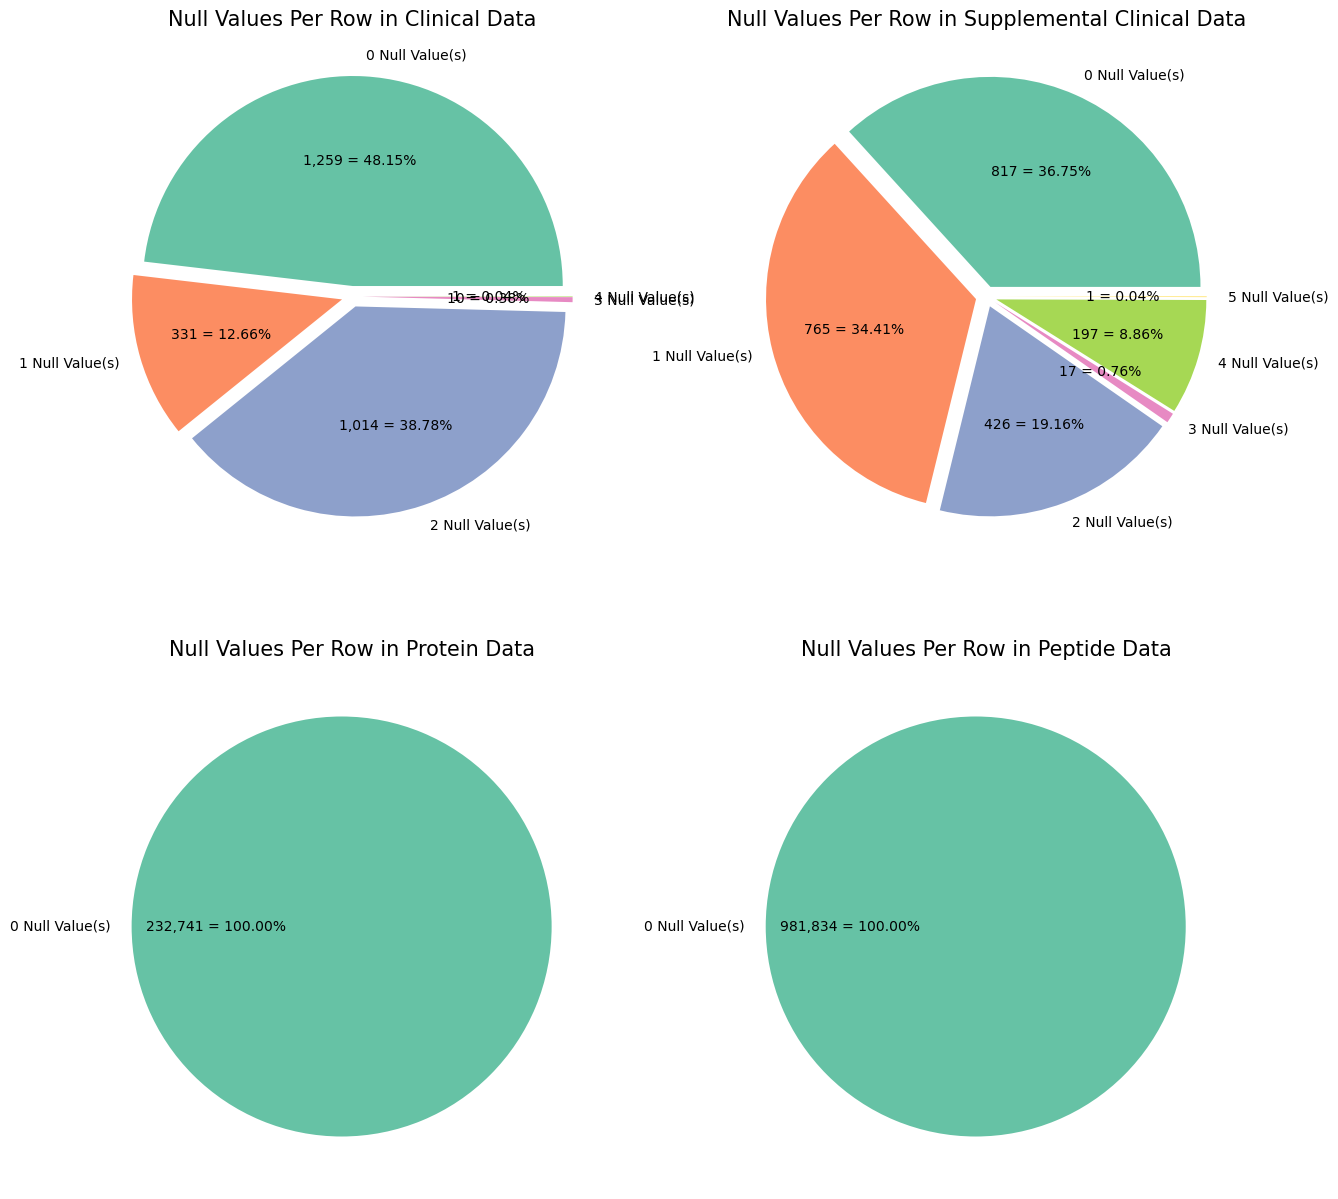

In [13]:
train_clinical_data["null_count"] = train_clinical_data.isnull().sum(axis=1)
counts_train_clinical_data = train_clinical_data.groupby("null_count")["visit_id"].count().to_dict()
null_train_clinical_data = {"{} Null Value(s)".format(k) : v for k, v in counts_train_clinical_data.items()}

train_peptides["null_count"] = train_peptides.isnull().sum(axis=1)
counts_train_peptides = train_peptides.groupby("null_count")["visit_id"].count().to_dict()
null_train_peptides = {"{} Null Value(s)".format(k) : v for k, v in counts_train_peptides.items()}

train_protiens["null_count"] = train_protiens.isnull().sum(axis=1)
counts_train_protiens = train_protiens.groupby("null_count")["visit_id"].count().to_dict()
null_train_protiens = {"{} Null Value(s)".format(k) : v for k, v in counts_train_protiens.items()}

supplemental_clinical_data["null_count"] = supplemental_clinical_data.isnull().sum(axis=1)
counts_supplemental_clinical_data = supplemental_clinical_data.groupby("null_count")["visit_id"].count().to_dict()
null_supplemental_clinical_data = {"{} Null Value(s)".format(k) : v for k, v in counts_supplemental_clinical_data.items()}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axs = axs.flatten()

_ = axs[0].pie(
    x=list(null_train_clinical_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_clinical_data.values())/100, x),
    explode=[0.05] * len(null_train_clinical_data.keys()), 
    labels=null_train_clinical_data.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_clinical_data.keys())],
)
_ = axs[0].set_title("Null Values Per Row in Clinical Data", fontsize=15)

_ = axs[3].pie(
    x=list(null_train_peptides.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_peptides.values())/100, x),
    explode=[0.05] * len(null_train_peptides.keys()), 
    labels=null_train_peptides.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_peptides.keys())],
)
_ = axs[3].set_title("Null Values Per Row in Peptide Data", fontsize=15)

_ = axs[2].pie(
    x=list(null_train_protiens.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_protiens.values())/100, x),
    explode=[0.05] * len(null_train_protiens.keys()), 
    labels=null_train_protiens.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_protiens.keys())],
)
_ = axs[2].set_title("Null Values Per Row in Protein Data", fontsize=15)

_ = axs[1].pie(
    x=list(null_supplemental_clinical_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_supplemental_clinical_data.values())/100, x),
    explode=[0.05] * len(null_supplemental_clinical_data.keys()), 
    labels=null_supplemental_clinical_data.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_supplemental_clinical_data.keys())],
)
_ = axs[1].set_title("Null Values Per Row in Supplemental Clinical Data", fontsize=15)

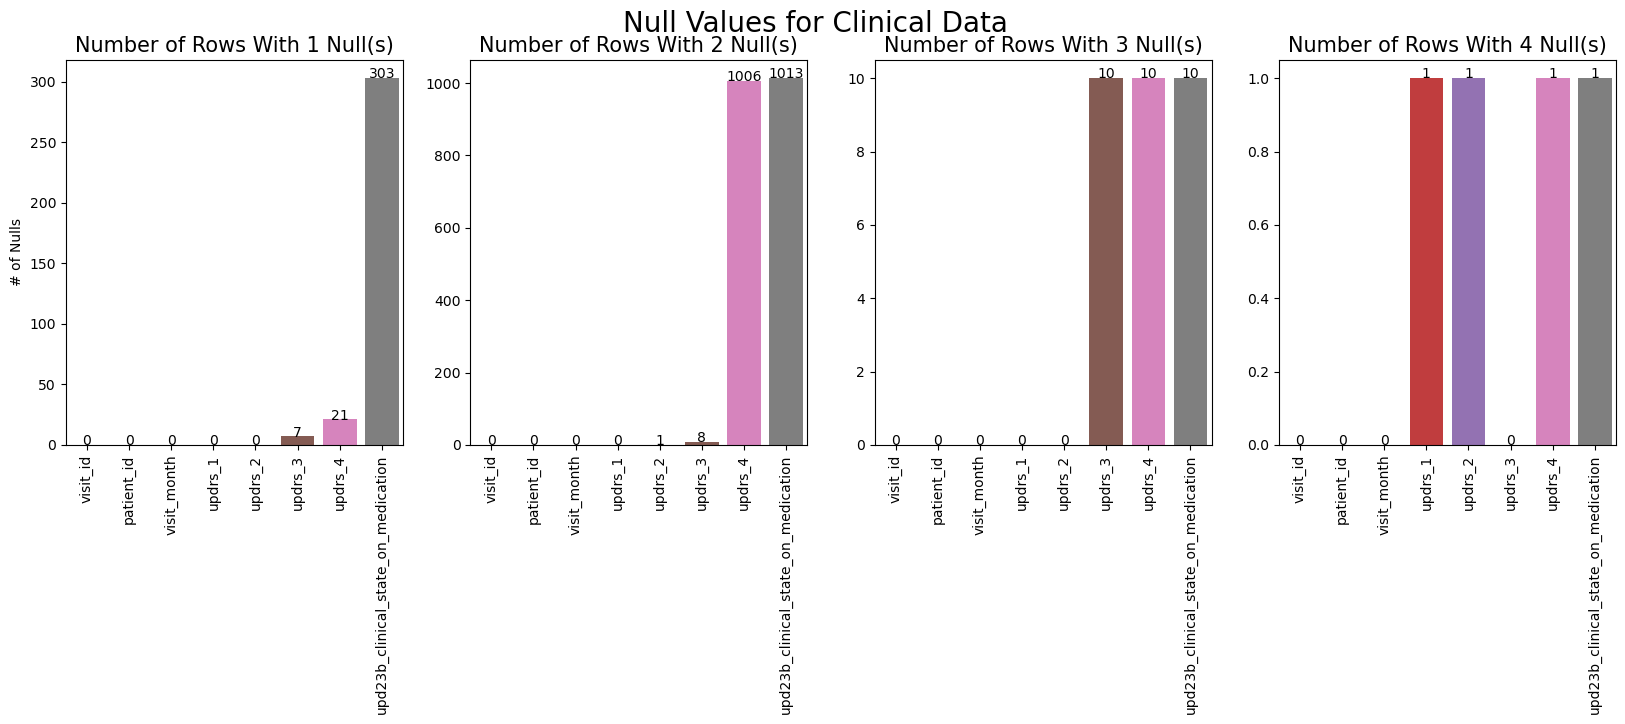

In [14]:
null_count_labels = [train_clinical_data[(train_clinical_data["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [train_clinical_data[(train_clinical_data["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Clinical Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

null_count_labels = [supplemental_clinical_data[(supplemental_clinical_data["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [supplemental_clinical_data[(supplemental_clinical_data["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Supplemental Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("Feature")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

### Duplicated Rows

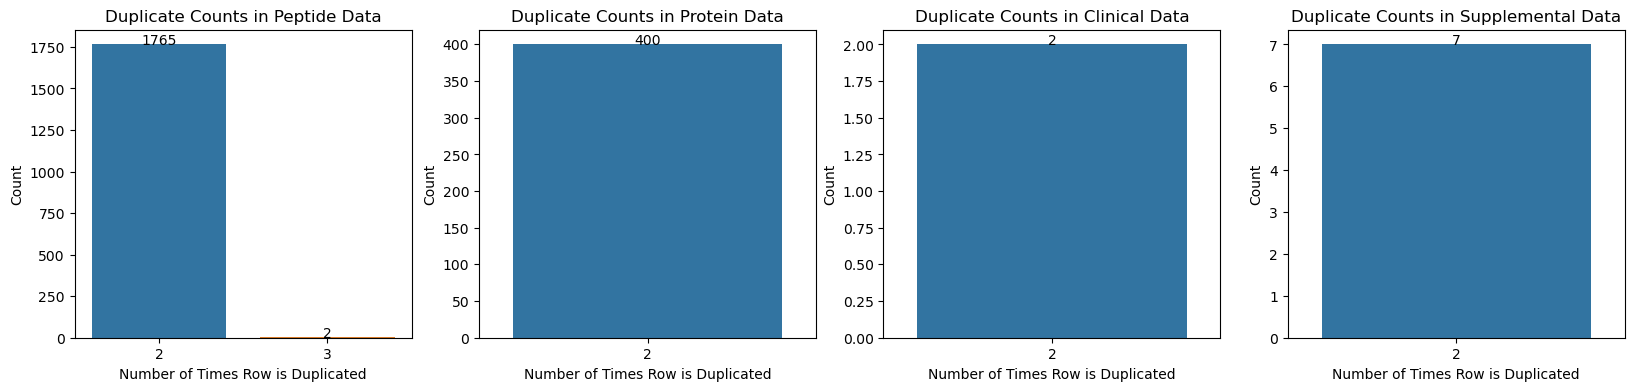

In [18]:
titles = ["Peptide Data", "Protein Data", "Clinical Data", "Supplemental Data"]
value_counts = []
duplicates = train_peptides.pivot_table(index=[
    'UniProt', 'Peptide', 'PeptideAbundance',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

duplicates = train_protiens.pivot_table(index=[
    'UniProt', 'NPX',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

duplicates = train_clinical_data.pivot_table(index=[
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

duplicates = supplemental_clinical_data.pivot_table(index=[
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

axs = axs.flatten()

for x in range(4):
    ax = axs[x]
    _ = sns.barplot(x=list(value_counts[x].keys())[1:], y=list(value_counts[x].values())[1:], ax=ax)
    _ = ax.set_title("Duplicate Counts in {}".format(titles[x], fontsize=15))
    _ = ax.set_ylabel("Count")
    _ = ax.set_xlabel("Number of Times Row is Duplicated")
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

### Clinical vs Supplemental Data

In [19]:
# Clinical data
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

train_clinical_data[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2615.000000,31.190822,25.199053,0.000000,10.500000,24.000000,48.000000,108.000000
updrs_1,2614.000000,7.110559,5.525955,0.000000,3.000000,6.000000,10.000000,33.000000
updrs_2,2613.000000,6.743590,6.323230,0.000000,1.000000,5.000000,10.000000,40.000000
updrs_3,2590.000000,19.421236,15.000289,0.000000,6.000000,19.000000,29.000000,86.000000
updrs_4,1577.000000,1.861763,3.022112,0.000000,0.000000,0.000000,3.000000,20.000000


In [20]:
# Supplemental Data
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

supplemental_clinical_data[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2223.000000,12.910481,13.060532,0.000000,0.000000,6.000000,24.000000,36.000000
updrs_1,2010.000000,5.684080,4.366964,0.000000,2.000000,5.000000,8.000000,27.000000
updrs_2,2009.000000,6.507715,4.968132,0.000000,2.000000,5.000000,10.000000,34.000000
updrs_3,2218.000000,22.917944,12.342596,0.000000,14.000000,22.000000,31.000000,72.000000
updrs_4,1295.000000,0.840154,1.860247,0.000000,0.000000,0.000000,0.000000,12.000000


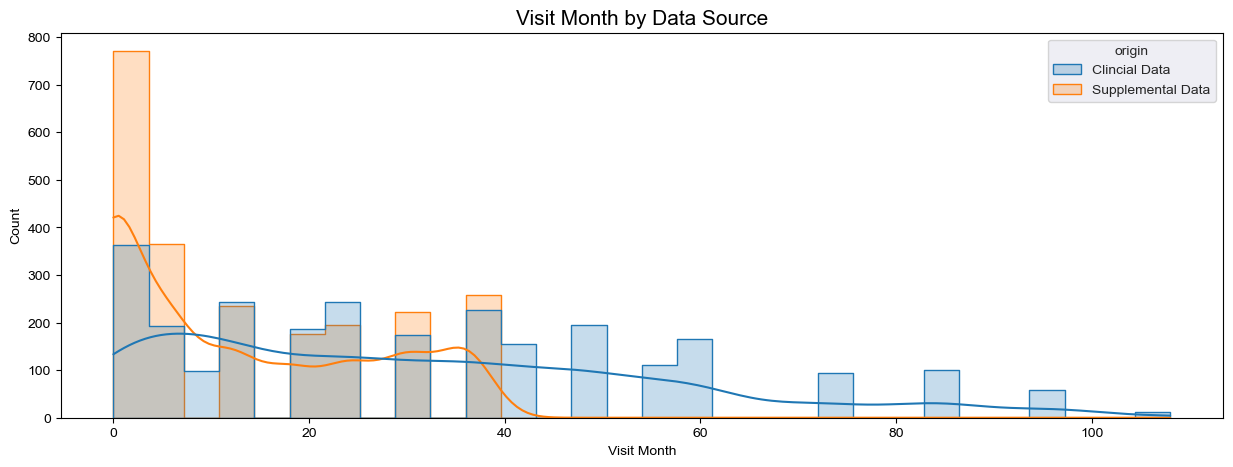

In [21]:
train_clinical_data["origin"] = "Clincial Data"
supplemental_clinical_data["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.histplot(data=combined, x="visit_month", hue="origin", kde=True, ax=ax, element="step")
_ = ax.set_title("Visit Month by Data Source", fontsize=15)
_ = ax.set_ylabel("Count")
_ = ax.set_xlabel("Visit Month")

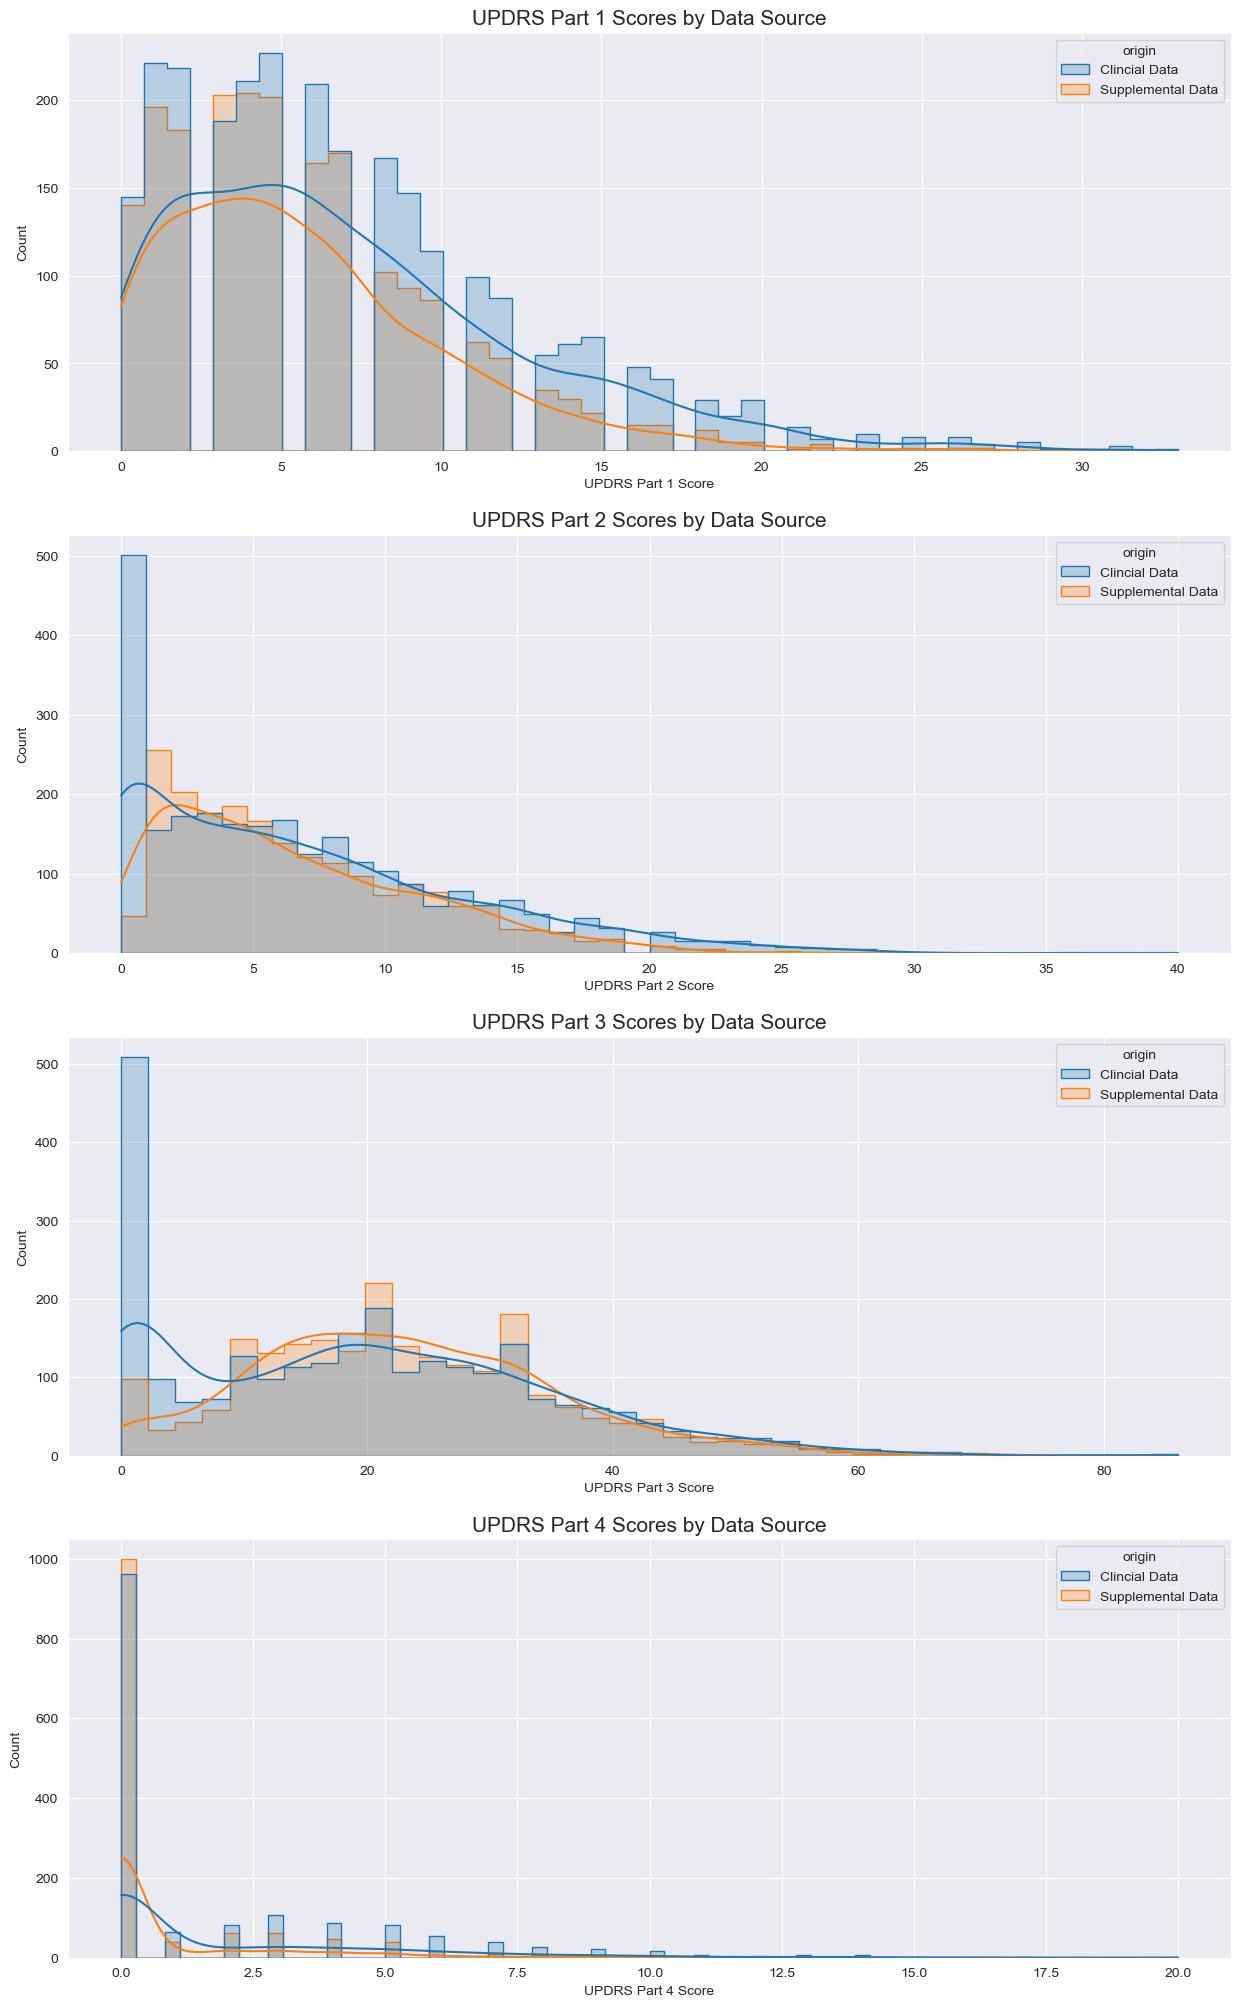

In [22]:
train_clinical_data["origin"] = "Clincial Data"
supplemental_clinical_data["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

features = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
labels = ["UPDRS Part 1", "UPDRS Part 2", "UPDRS Part 3", "UPDRS Part 4"]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

sns.set_style('darkgrid')

for x, feature in enumerate(features):
    ax = axs[x]
    _ = sns.histplot(data=combined, x=feature, hue="origin", kde=True, ax=ax, element="step")
    _ = ax.set_title("{} Scores by Data Source".format(labels[x]), fontsize=15)
    _ = ax.set_ylabel("Count")
    _ = ax.set_xlabel("{} Score".format(labels[x]))

-------> Fold 1 <--------
: AUC ROC = 0.93284295239891
-------> Fold 2 <--------
: AUC ROC = 0.9443979556368038
-------> Fold 3 <--------
: AUC ROC = 0.927000150024647
-------> Fold 4 <--------
: AUC ROC = 0.9435134052227236
-------> Fold 5 <--------
: AUC ROC = 0.9532604768786127
--> Overall results for out of fold predictions
: AUC ROC = 0.9389806206451068


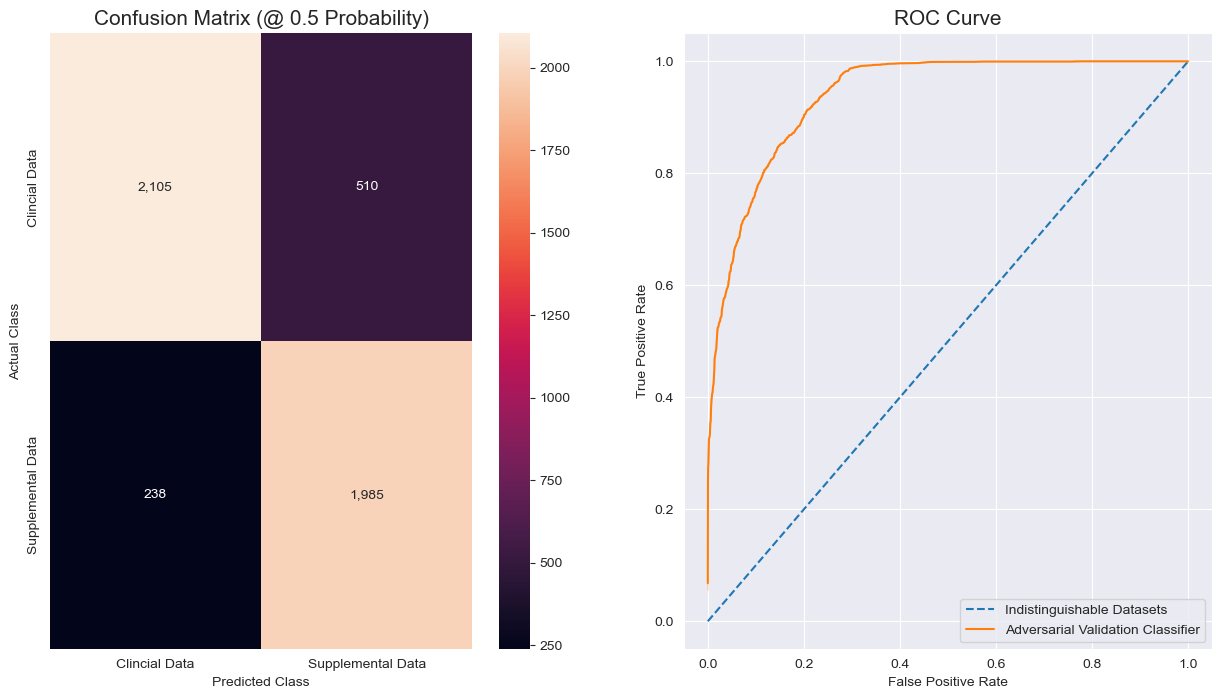

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

train_clinical_data["origin"] = 0
supplemental_clinical_data["origin"] = 1

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication',
]

le = LabelEncoder()
combined['upd23b_clinical_state_on_medication'] = le.fit_transform(combined['upd23b_clinical_state_on_medication'])
    
n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((combined.shape[0],))
train_oof_probas = np.zeros((combined.shape[0],))

for fold, (train_index, test_index) in enumerate(skf.split(combined, combined["origin"])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(combined.iloc[train_index]), pd.DataFrame(combined.iloc[test_index])
    y_train, y_valid = combined["origin"].iloc[train_index], combined["origin"].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = LGBMClassifier(
        random_state=2023,
        objective="binary",
        metric="auc",
        n_jobs=-1,
        n_estimators=2000,
        verbose=-1,  
        max_depth=3,
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        callbacks=[
            early_stopping(50, verbose=False),
            log_evaluation(2000),
        ]
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_probas = model.predict_proba(x_valid_features[features])[:,1]
    train_oof_preds[test_index] = oof_preds
    train_oof_probas[test_index] = oof_probas
    print(": AUC ROC = {}".format(roc_auc_score(y_valid, oof_probas)))
    
auc_vanilla = roc_auc_score(combined["origin"], train_oof_probas)
fpr, tpr, _ = roc_curve(combined["origin"], train_oof_probas)
print("--> Overall results for out of fold predictions")
print(": AUC ROC = {}".format(auc_vanilla))

confusion = confusion_matrix(combined["origin"], train_oof_preds)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

labels = ["Clincial Data", "Supplemental Data"]

_ = sns.heatmap(confusion, annot=True, fmt=",d", ax=axs[0], xticklabels=labels, yticklabels=labels)
_ = axs[0].set_title("Confusion Matrix (@ 0.5 Probability)", fontsize=15)
_ = axs[0].set_ylabel("Actual Class")
_ = axs[0].set_xlabel("Predicted Class")

_ = sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets", ax=axs[1])
_ = sns.lineplot(x=fpr, y=tpr, ax=axs[1], label="Adversarial Validation Classifier")
_ = axs[1].set_title("ROC Curve", fontsize=15)
_ = axs[1].set_xlabel("False Positive Rate")
_ = axs[1].set_ylabel("True Positive Rate")

### Protein data

In [ ]:
# Protein data
train_protiens[["NPX"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

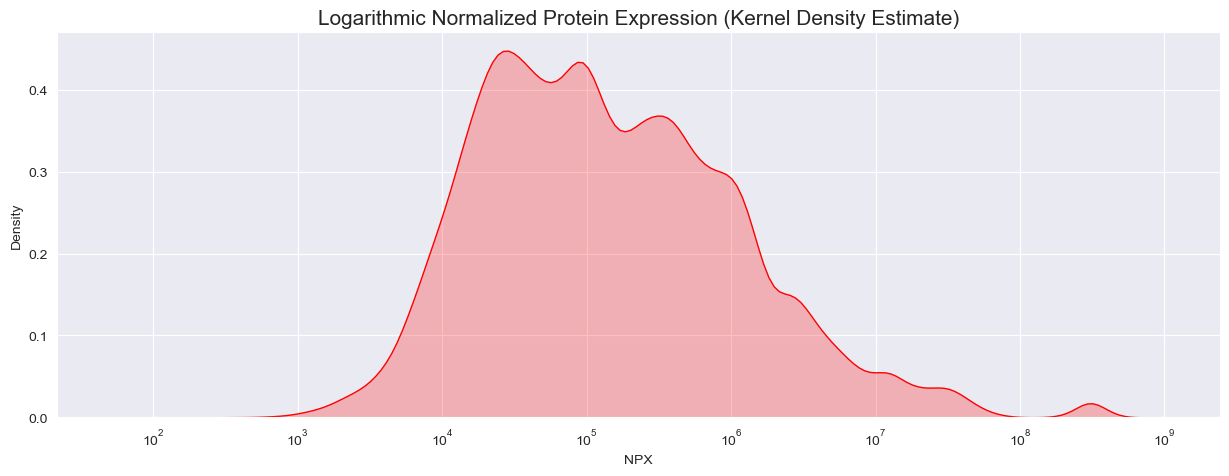

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(train_protiens["NPX"], shade=True, color="r", ax=ax, label="Normalized Protein Expression", log_scale=True)
_ = ax.set_title("Logarithmic Normalized Protein Expression (Kernel Density Estimate)", fontsize=15)

### Peptide Data

In [25]:
# peptide Data
train_peptides[["PeptideAbundance"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
PeptideAbundance,981834.000000,642890.245933,3377989.092586,10.998500,28174.250000,74308.300000,221338.750000,178752000.000000


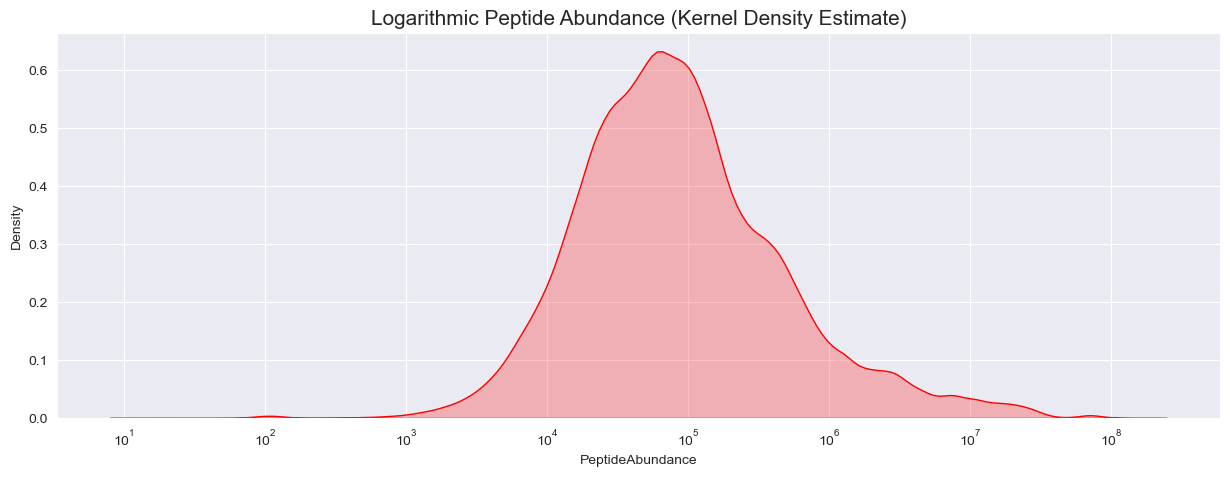

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(train_peptides["PeptideAbundance"], shade=True, color="r", ax=ax, label="Peptide Abundance", log_scale=True)
_ = ax.set_title("Logarithmic Peptide Abundance (Kernel Density Estimate)", fontsize=15)

### Visit Month vs UPDRS

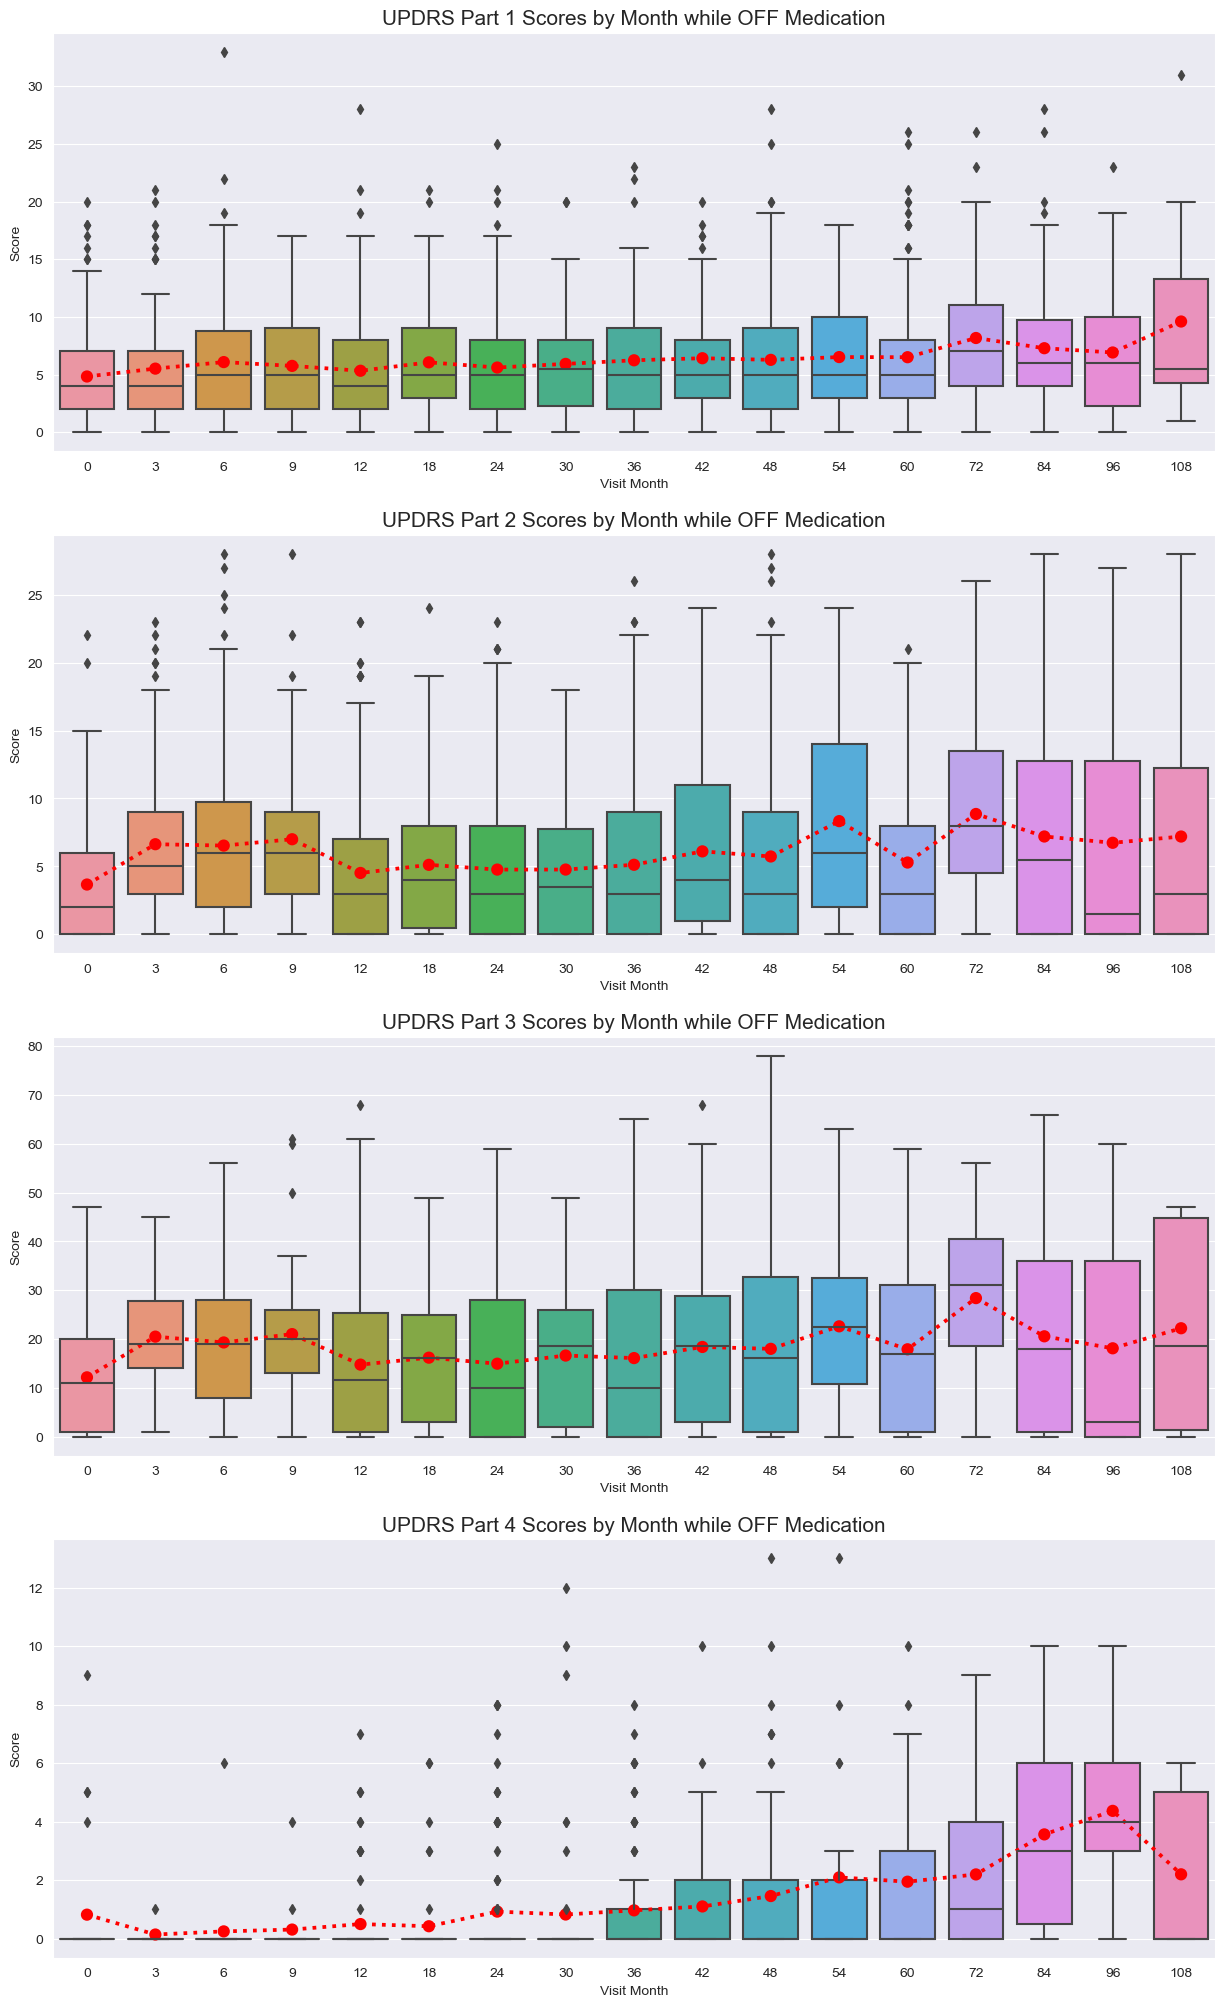

In [27]:
# Visit Month vs UPDRS
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while OFF Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

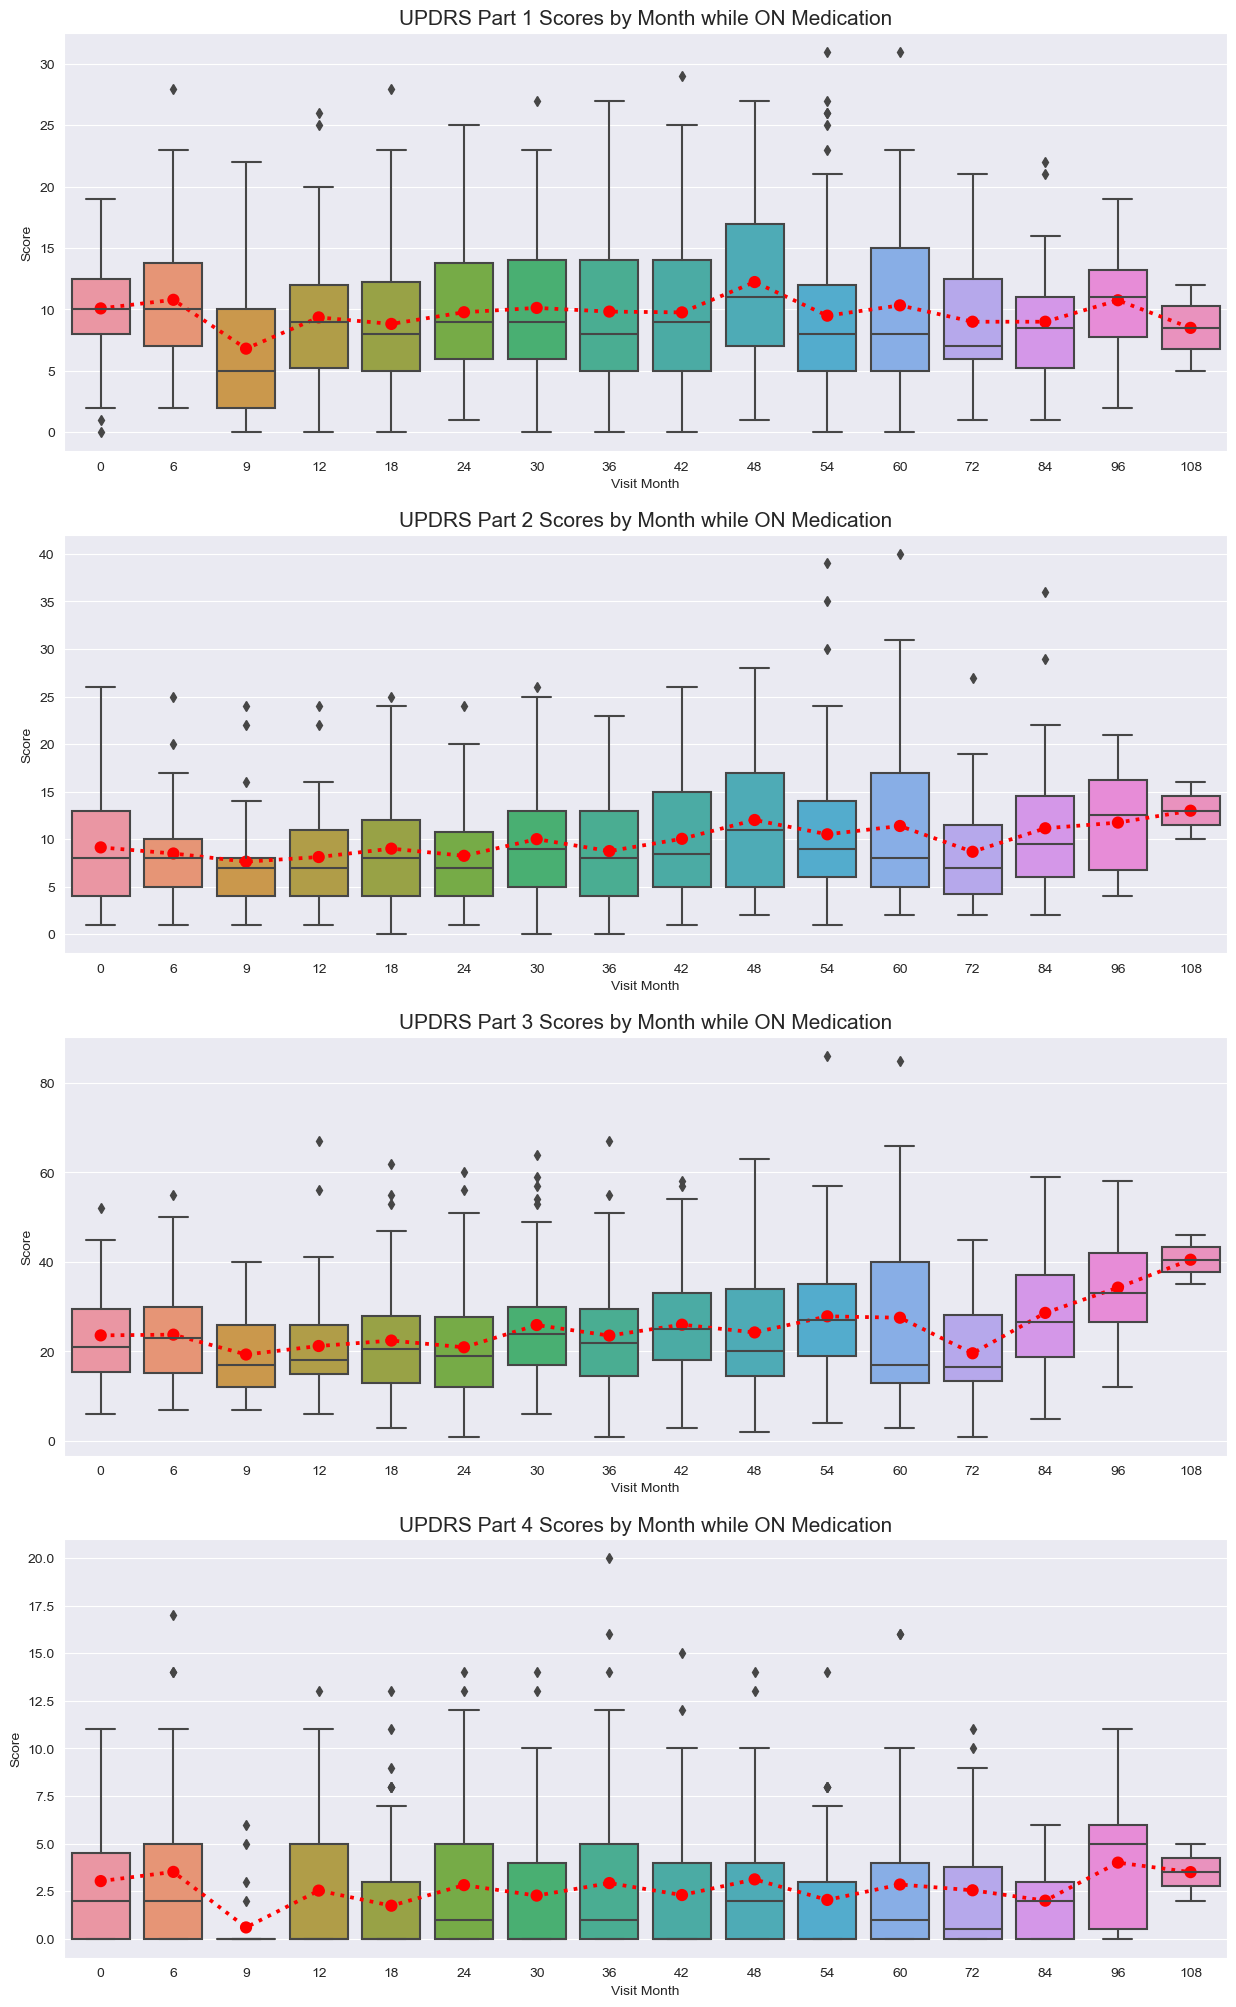

In [28]:
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while ON Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

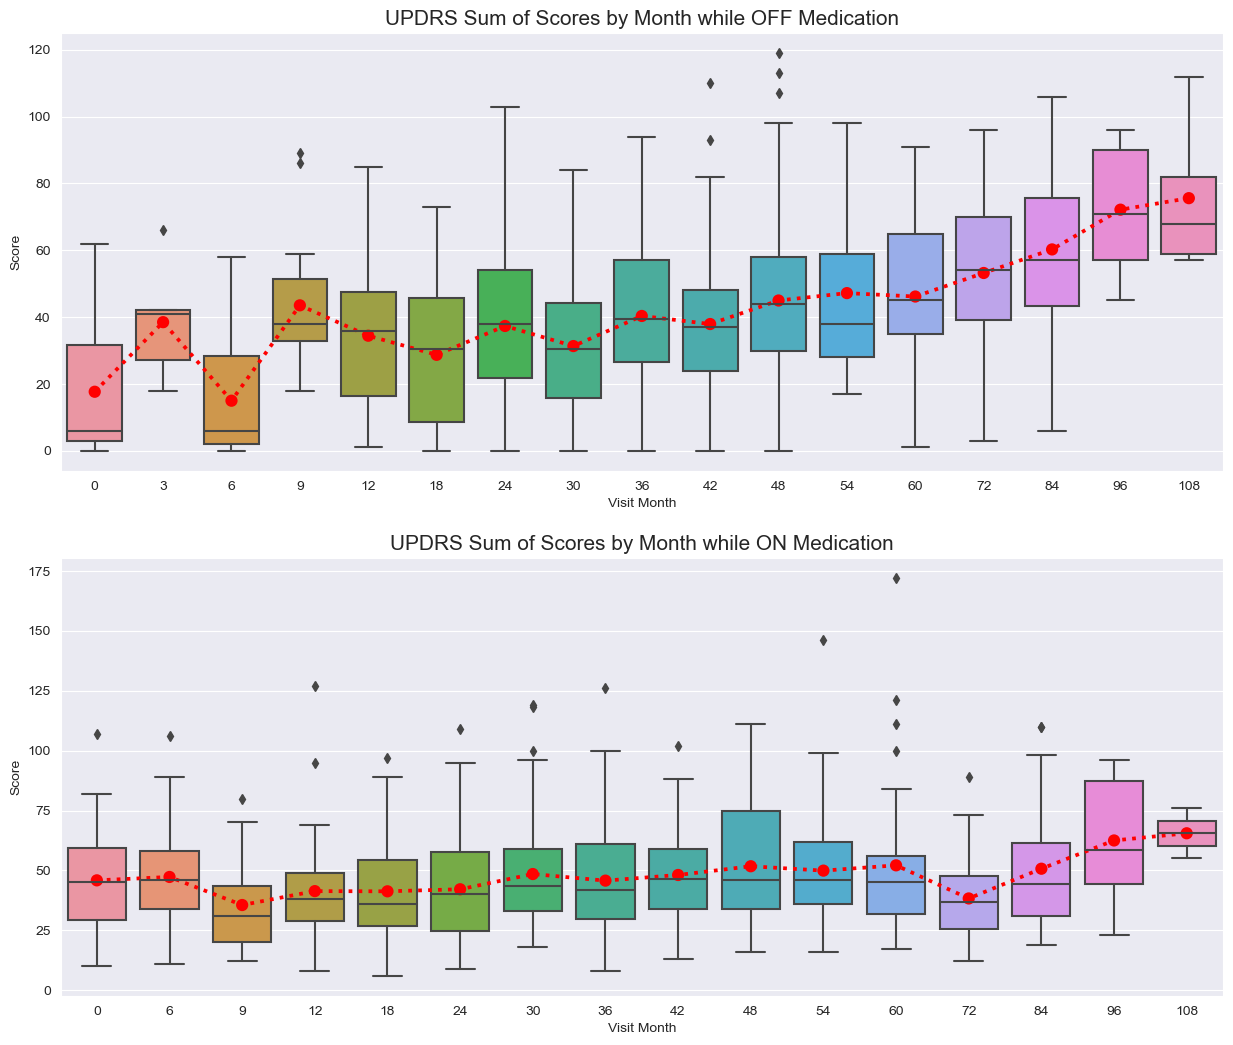

In [29]:
train_clinical_data["updrs_sum"] = train_clinical_data["updrs_1"] + train_clinical_data["updrs_2"] + train_clinical_data["updrs_3"] + train_clinical_data["updrs_4"]
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12.5))

axs = axs.flatten()

sns.set_style('darkgrid')

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
ax = axs[0]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while OFF Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
ax = axs[1]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while ON Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

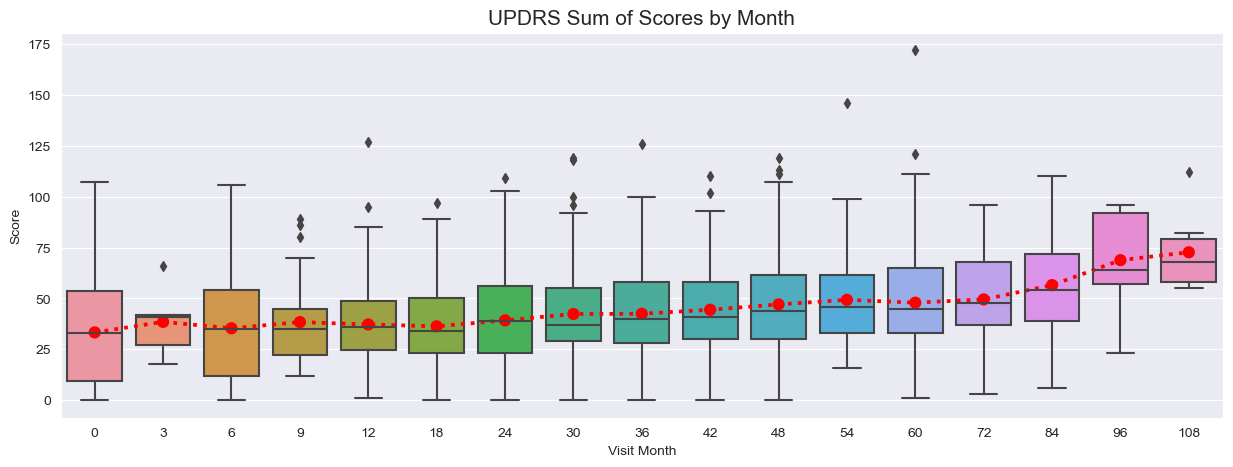

In [30]:
train_clinical_data["updrs_sum"] = train_clinical_data["updrs_1"] + train_clinical_data["updrs_2"] + train_clinical_data["updrs_3"] + train_clinical_data["updrs_4"]
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_clincial_data_copy, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=train_clincial_data_copy, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

### Visit Month vs Protein Data

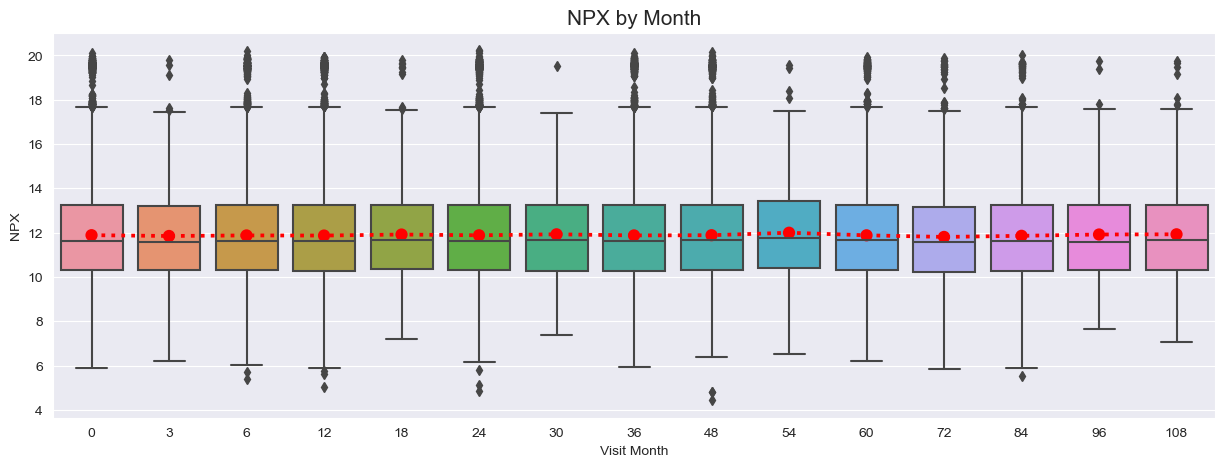

In [31]:
# Visit Month vs Protein Data
train_protiens_copy = train_protiens.copy()
train_protiens_copy["log_NPX"] = np.log(train_protiens_copy["NPX"])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_protiens_copy, x="visit_month", y="log_NPX", ax=ax)
_ = sns.pointplot(data=train_protiens_copy, x="visit_month", y="log_NPX", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("NPX by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("NPX")

In [32]:
unique_proteins = train_protiens["UniProt"].unique()
unique_months = train_protiens["visit_month"].unique()

protein_dict = dict()
for protein in unique_proteins:
    if protein not in protein_dict:
        protein_dict[protein] = {
            "months": unique_months,
            "count_NPX": [train_protiens[(train_protiens["UniProt"] == protein) & (train_protiens["visit_month"] == month)]["NPX"].count() for month in unique_months],
            "total_NPX": [train_protiens[(train_protiens["UniProt"] == protein) & (train_protiens["visit_month"] == month)]["NPX"].sum() for month in unique_months],
            "avg_NPX": [0 * len(unique_months)],
        }
        
for protein in unique_proteins:
    protein_dict[protein]["avg_NPX"] = [float(total) / count for total, count in zip(protein_dict[protein]["total_NPX"], protein_dict[protein]["count_NPX"])]
    
for protein in unique_proteins:
    protein_dict[protein]["min_NPX"] = min(protein_dict[protein]["avg_NPX"])
    protein_dict[protein]["max_NPX"] = max(protein_dict[protein]["avg_NPX"])
    
for protein in unique_proteins:
    protein_dict[protein]["mean"] = sum(protein_dict[protein]["avg_NPX"]) / len(protein_dict[protein]["months"])
    protein_dict[protein]["std"] = sum([(total_NPX - protein_dict[protein]["mean"]) ** 2 for total_NPX in protein_dict[protein]["avg_NPX"]]) / (len(unique_months) - 1)
    protein_dict[protein]["std"] = protein_dict[protein]["std"] ** 0.5
    
proteins_with_large_std = [protein for protein in unique_proteins if protein_dict[protein]["std"] > (protein_dict[protein]["mean"] * .25)]

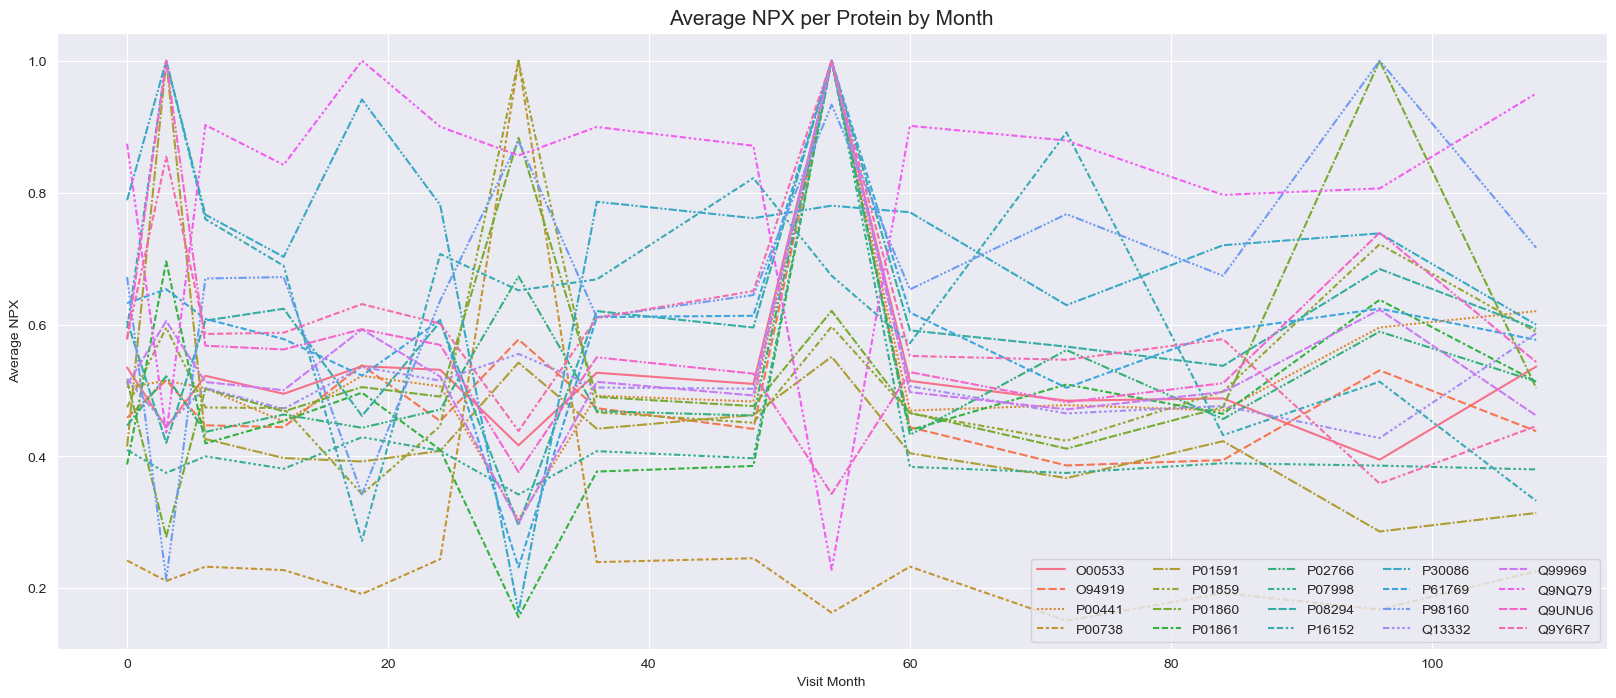

In [33]:
import math

proteins_of_interest_by_month = {
    "UniProt": [],
    "Visit Month": [],
    "Average NPX": [],
}
for protein in proteins_with_large_std:
    for month_index, month in enumerate(unique_months):
        proteins_of_interest_by_month["UniProt"].append(protein)
        proteins_of_interest_by_month["Visit Month"].append(month)
        value = protein_dict[protein]["avg_NPX"][month_index]
        value /= protein_dict[protein]["max_NPX"]
        proteins_of_interest_by_month["Average NPX"].append(value)
        
df = pd.DataFrame(proteins_of_interest_by_month)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))

sns.set_style('darkgrid')

_ = sns.lineplot(data=df, x="Visit Month", y="Average NPX", hue="UniProt", style="UniProt", ax=ax)
_ = ax.set_title("Average NPX per Protein by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Average NPX")
_ = plt.legend(ncol=5)

### Protein UniProt and NPX

In [34]:
proteins = []
protein_dict = {}
for index, row in train_protiens.iterrows():
    protein = row["UniProt"]
    if protein not in protein_dict:
        protein_dict[protein] = {}
        proteins.append(protein)
    protein_dict[protein][row["visit_id"]] = row["NPX"]
    
peptides = []
peptide_dict = {}
for index, row in train_peptides.iterrows():
    peptide = row["Peptide"]
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
        peptides.append(peptide)
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]
    
train_copy = train_clinical_data.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])
    
for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in peptide_dict[peptide] else peptide_dict[peptide][visit_id])

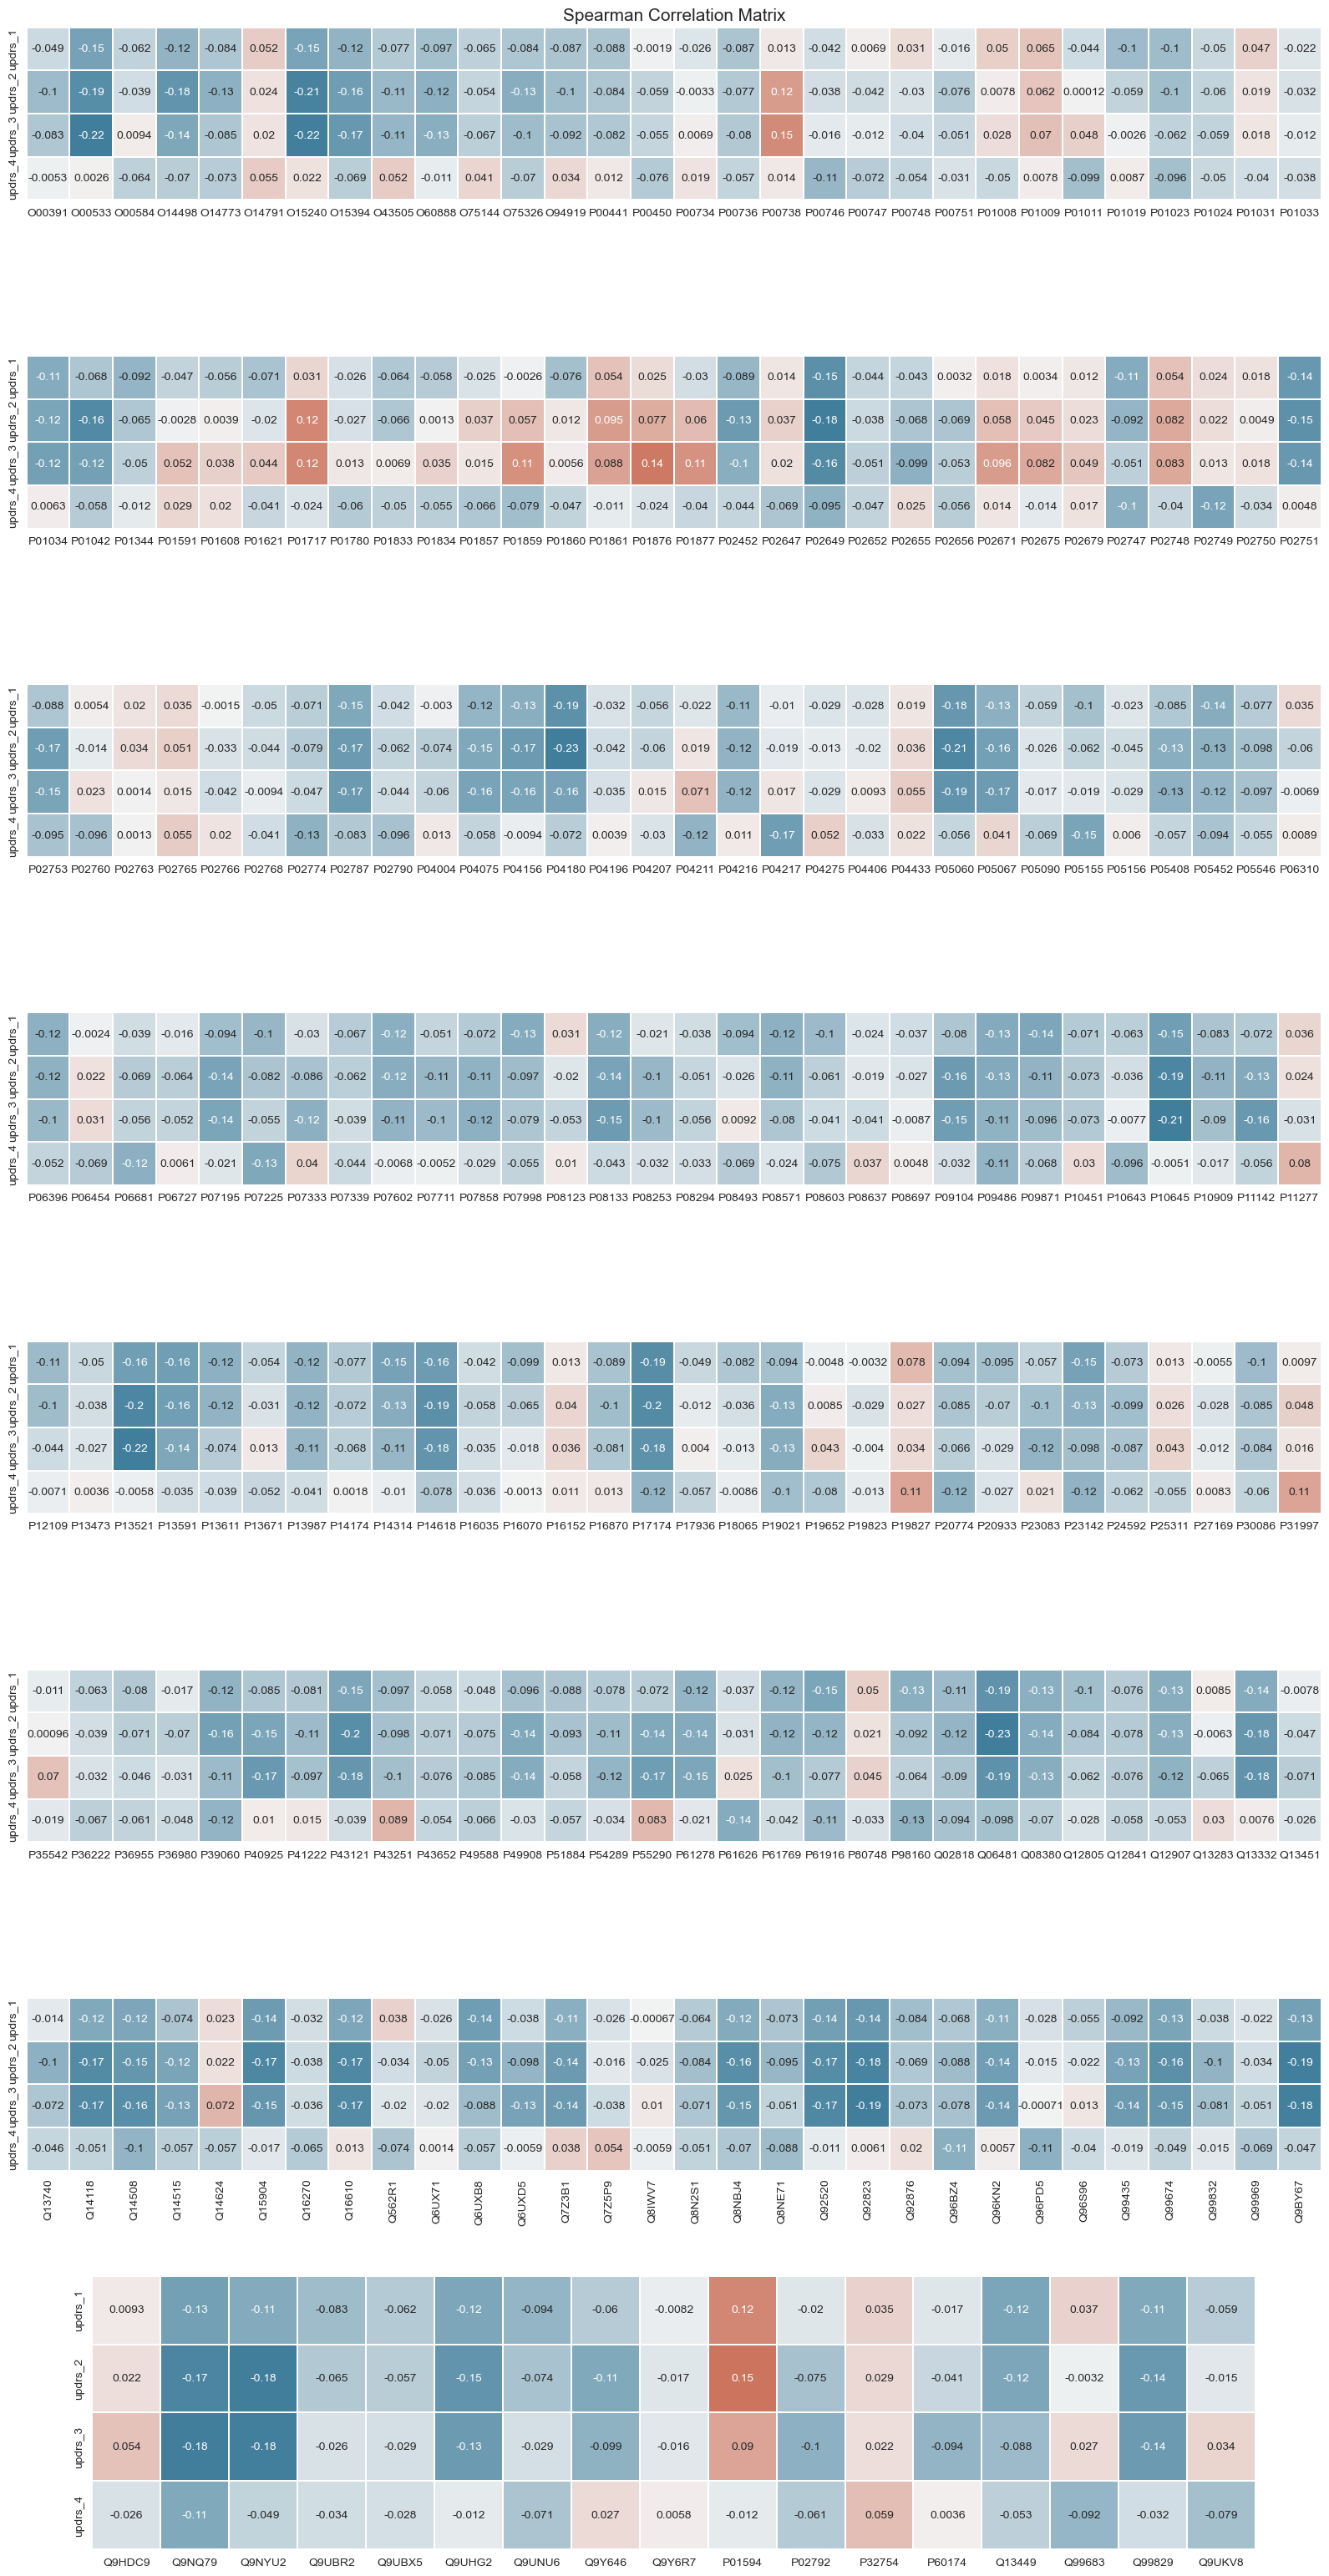

In [35]:
features = []
features.extend(proteins)

# Set missing values to null so our correlation matrix won't include 0 values in the correlation calculation
train_copy[features] = train_copy[features].replace(0.0, np.nan)

features.extend(["updrs_1", "updrs_2", "updrs_3", "updrs_4"])

correlation_matrix = train_copy[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(20, 40))

axs = axs.flatten()

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,0:30],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[0], annot=True,
)
_ = axs[0].set_title("Spearman Correlation Matrix", fontsize=15)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,30:60],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[1], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,60:90],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[2], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,90:120],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[3], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,120:150],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[4], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,150:180],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[5], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,180:210],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[6], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,210:227],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[7], annot=True,
)

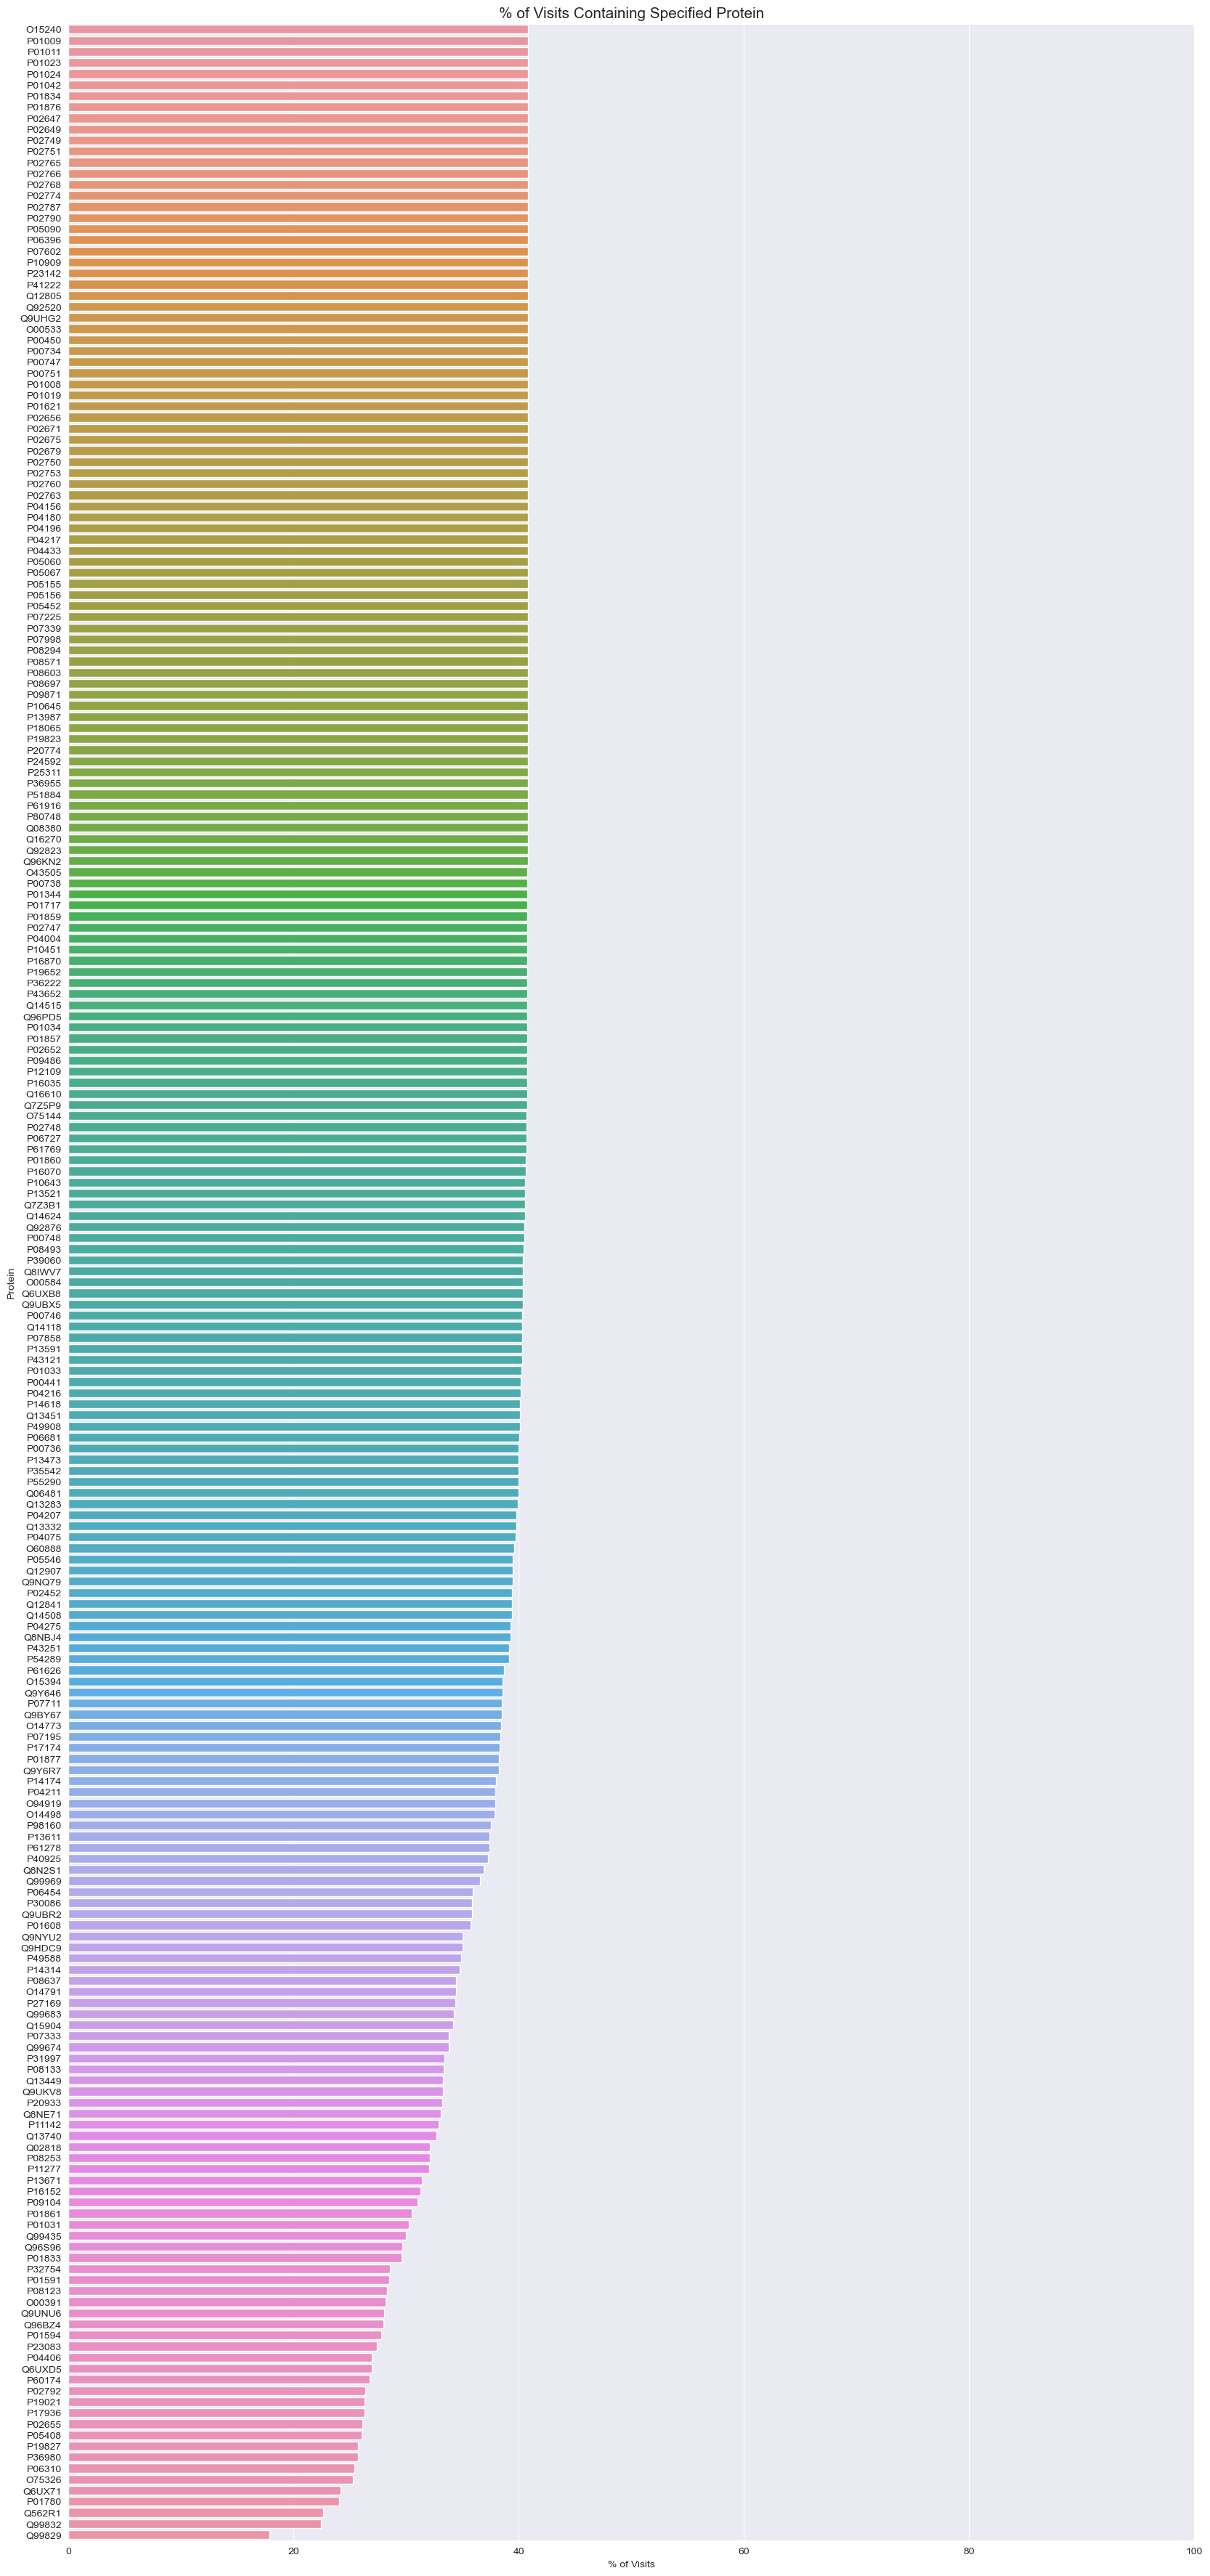

In [36]:
protein_counts = {}

for protein in proteins:
    protein_counts[protein] = float(len(train_copy[(train_copy[protein] > 0.0)][protein])) / len(train_copy[protein]) * 100

protein_counts = dict(sorted(protein_counts.items(), key=lambda x:x[1], reverse=True))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 45))

_ = sns.barplot(y=list(protein_counts.keys()), x=list(protein_counts.values()), ax=ax)
_ = ax.set_title("% of Visits Containing Specified Protein", fontsize=15)
_ = ax.set_ylabel("Protein")
_ = ax.set_xlabel("% of Visits")
_ = ax.set_xlim([0, 100])

In [37]:
protein_month_counts = {}

for protein in proteins:
    protein_month_counts[protein] = {month: 0 for month in range(109)}
    for x in range(109):
        protein_month_counts[protein][x] = len(train_copy[(train_copy[protein] > 0.0) & (train_copy["visit_month"] == x)][protein])

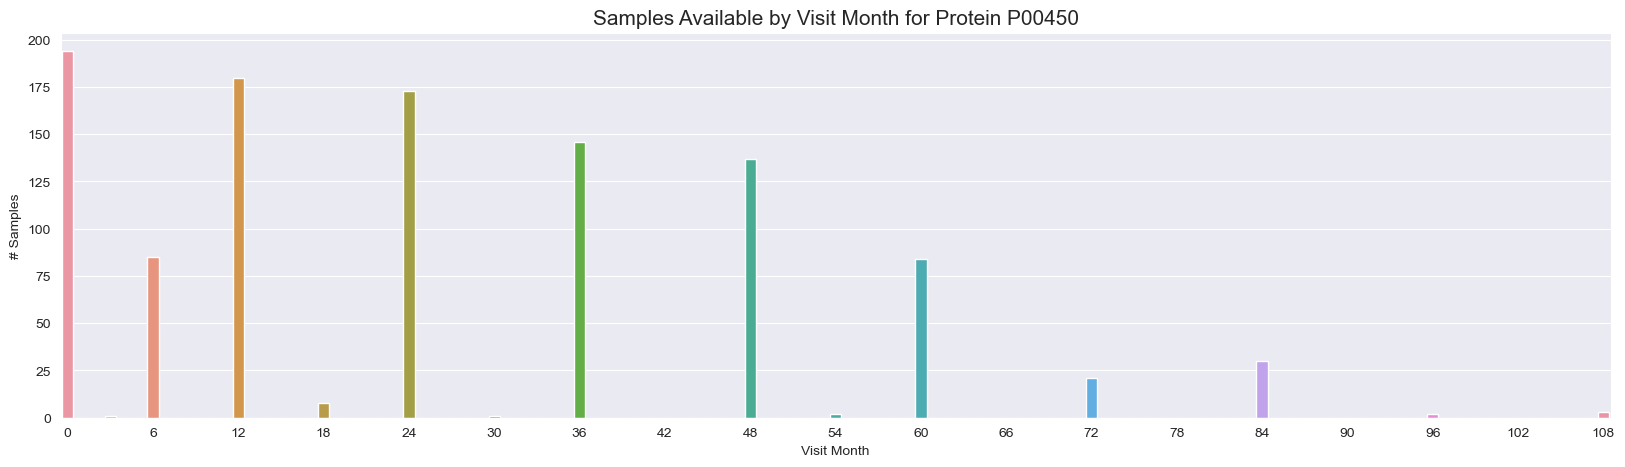

In [38]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

_ = sns.barplot(x=list(protein_month_counts["P00450"].keys()), y=list(protein_month_counts["P00450"].values()), ax=ax)
_ = ax.set_title("Samples Available by Visit Month for Protein P00450", fontsize=15)
_ = ax.set_ylabel("# Samples")
_ = ax.set_xlabel("Visit Month")
_ = ax.xaxis.set_major_locator(MultipleLocator(6))
_ = ax.xaxis.set_major_formatter('{x:.0f}')
_ = ax.xaxis.set_minor_locator(MultipleLocator(3))

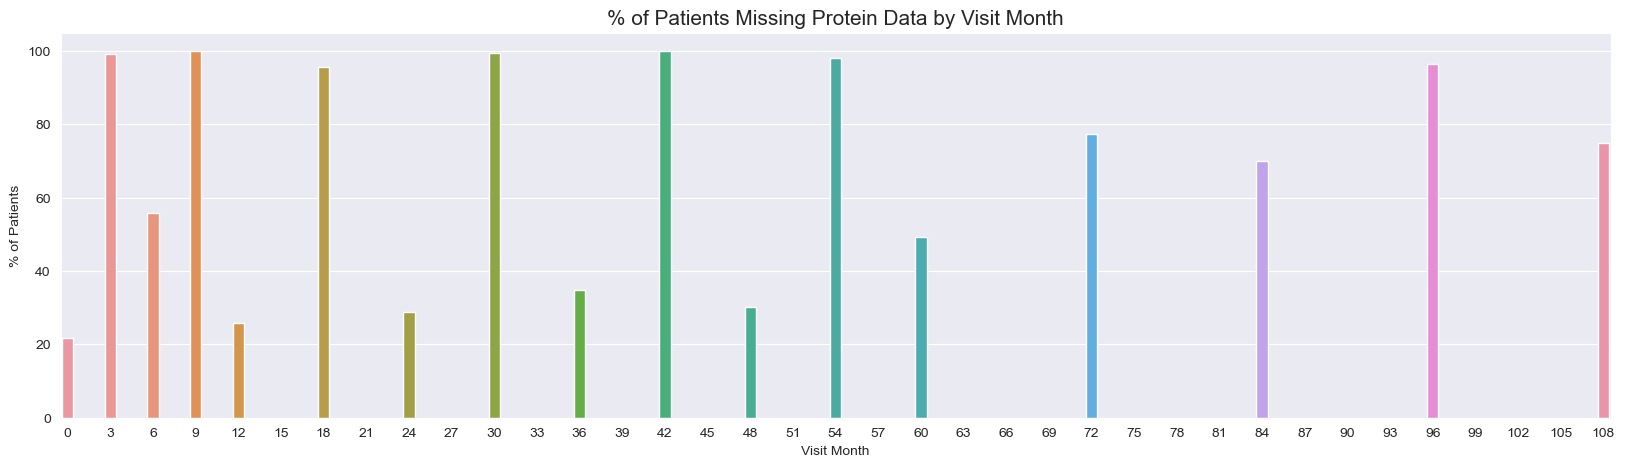

In [39]:
train_copy = train_copy.fillna(0)
train_copy["missing_all"] = train_copy[proteins].apply(lambda x: 1 if sum([y for y in x]) == 0 else 0, axis=1)

missing_month_counts = [train_copy[(train_copy["visit_month"] == x)]["missing_all"].sum() / float(train_copy[(train_copy["visit_month"] == x)]["patient_id"].count()) * 100 for x in range(109)]
missing_month_labels = [x for x in range(109)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

_ = sns.barplot(x=missing_month_labels, y=missing_month_counts, ax=ax)
_ = ax.set_title("% of Patients Missing Protein Data by Visit Month", fontsize=15)
_ = ax.set_ylabel("% of Patients")
_ = ax.set_xlabel("Visit Month")
_ = ax.xaxis.set_major_locator(MultipleLocator(3))
_ = ax.xaxis.set_major_formatter('{x:.0f}')
_ = ax.xaxis.set_minor_locator(MultipleLocator(3))

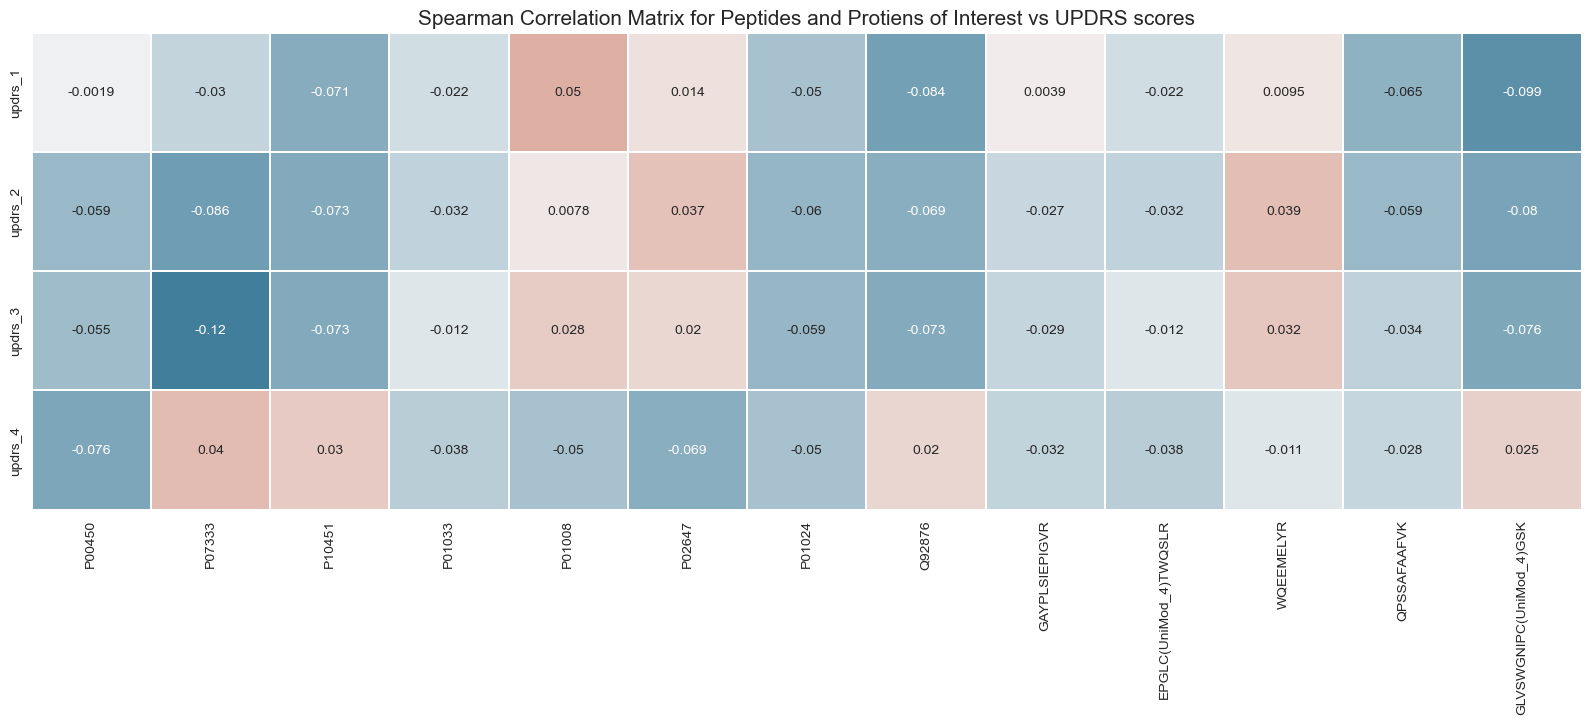

In [40]:
proteins = ["P00450", "P07333", "P10451", "P01033", "P01008", "P02647", "P01024", "Q92876"]
peptides = ["GAYPLSIEPIGVR", "EPGLC(UniMod_4)TWQSLR", "WQEEMELYR", "QPSSAFAAFVK", "GLVSWGNIPC(UniMod_4)GSK"]

protein_dict = {}
for index, row in train_protiens.iterrows():
    protein = row["UniProt"]
    if protein not in protein_dict:
        protein_dict[protein] = {}
    protein_dict[protein][row["visit_id"]] = row["NPX"]
    
peptide_dict = {}
for index, row in train_peptides.iterrows():
    peptide = row["Peptide"]
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]
    
train_copy = train_clinical_data.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])
    
for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in peptide_dict[peptide] else peptide_dict[peptide][visit_id])
    
features = []
features.extend(proteins)
features.extend(peptides)

# Set missing values to null so our correlation matrix won't include 0 values in the correlation calculation
train_copy[features] = train_copy[features].replace(0.0, np.nan)

features.extend(["updrs_1", "updrs_2", "updrs_3", "updrs_4"])

correlation_matrix = train_copy[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix.iloc[13:17,0:13], 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Spearman Correlation Matrix for Peptides and Protiens of Interest vs UPDRS scores", fontsize=15)

### Models

### 1. Baseline CatBoost Model

In [42]:
train_dict = {}

for index, row in train_clinical_data.iterrows():
    patient_id = row["patient_id"]
    visit_month = row["visit_month"]
    if patient_id not in train_dict:
        train_dict[patient_id] = {}
    train_dict[patient_id][visit_month] = {
           "updrs_1": row["updrs_1"],
           "updrs_2": row["updrs_2"],
           "updrs_3": row["updrs_3"],
           "updrs_4": row["updrs_4"],
    }
    
train = train_clinical_data.copy()
train["month_offset"] = 0

for index, row in train_clinical_data.iterrows():
    visit_id = row["visit_id"]
    patient_id = row["patient_id"]
    visit_month = row["visit_month"]
    month_offsets = [6, 12, 24]
    for month_offset in month_offsets:
        new_visit_month = visit_month + month_offset
        if new_visit_month in train_dict[patient_id]:
            new_row = {
                "visit_id": visit_id,
                "visit_month": visit_month,
                "month_offset": month_offset,
                "patient_id": patient_id,
                "updrs_1": train_dict[patient_id][new_visit_month]["updrs_1"],
                "updrs_2": train_dict[patient_id][new_visit_month]["updrs_2"],
                "updrs_3": train_dict[patient_id][new_visit_month]["updrs_3"],
                "updrs_4": train_dict[patient_id][new_visit_month]["updrs_4"],
                "upd23b_clinical_state_on_medication": row["upd23b_clinical_state_on_medication"],
            }
            train = train.append(new_row, ignore_index=True)

In [44]:
pip install catboost

     ------------------------------------- 101.0/101.0 MB 23.4 MB/s eta 0:00:00
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


-------> Fold 1 <--------
: SMAPE = 96.11611611122025
-------> Fold 2 <--------
: SMAPE = 96.34695243844213
-------> Fold 3 <--------
: SMAPE = 94.33612317014418
-------> Fold 4 <--------
: SMAPE = 96.33976908339322
-------> Fold 5 <--------
: SMAPE = 95.67132206485908
--> Overall results for out of fold predictions
: SMAPE = 95.76205657361177


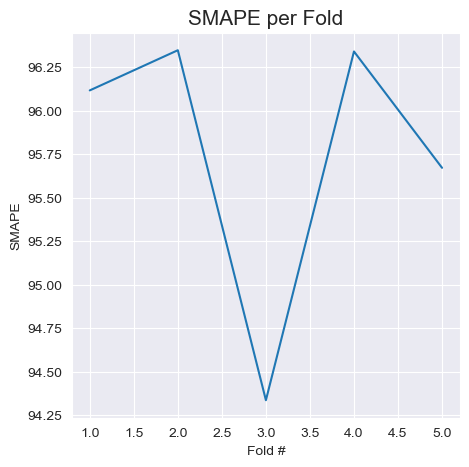

In [45]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold

def smape(y_true, y_pred):
    denominator = (y_true + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff)

features = [
    'visit_month', 'month_offset',
]

train_copy = train.copy()
train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)

n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((train.shape[0], 4))
smape_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(train_copy, train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(train_copy.iloc[train_index]), pd.DataFrame(train_copy.iloc[test_index])
    y_train, y_valid = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[train_index], train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,    
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )
    oof_preds = model.predict(x_valid_features[features])
    train_oof_preds[test_index] = np.rint(oof_preds)

    reshaped_truth = y_valid.to_numpy().reshape(-1, 1)
    new_preds = np.rint(oof_preds)
    reshaped_preds = new_preds.reshape(-1, 1)

    local_smape = smape(reshaped_truth.flatten(), reshaped_preds.flatten())
    smape_scores.append(local_smape)
    print(": SMAPE = {}".format(local_smape))
    
smape_baseline = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(": SMAPE = {}".format(smape_baseline))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")

### 2. Constant UPDRS 4

-------> Fold 1 <--------
: SMAPE = 68.50335901201638
-------> Fold 2 <--------
: SMAPE = 71.22212065098059
-------> Fold 3 <--------
: SMAPE = 67.63800513840444
-------> Fold 4 <--------
: SMAPE = 69.4229766507415
-------> Fold 5 <--------
: SMAPE = 70.80235309756256
--> Overall results for out of fold predictions
: SMAPE = 69.5177629099411


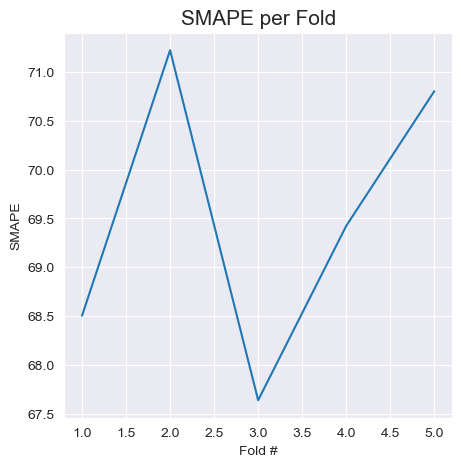

In [47]:
features = [
    'visit_month', 'month_offset',
]

train_copy = train.copy()
train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)

n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((train.shape[0], 4))
smape_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(train_copy, train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(train_copy.iloc[train_index]), pd.DataFrame(train_copy.iloc[test_index])
    y_train, y_valid = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[train_index], train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,    
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_preds[:, 3] = 0
    train_oof_preds[test_index] = np.rint(oof_preds)

    reshaped_truth = y_valid.to_numpy().reshape(-1, 1)
    new_preds = np.rint(oof_preds)
    reshaped_preds = new_preds.reshape(-1, 1)

    local_smape = smape(reshaped_truth.flatten(), reshaped_preds.flatten())
    smape_scores.append(local_smape)
    print(": SMAPE = {}".format(local_smape))
    
smape_updrs40 = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(": SMAPE = {}".format(smape_updrs40))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")

### 3. Supplemental Data

-------> Fold 1 <--------
: SMAPE = 68.39341287390445
-------> Fold 2 <--------
: SMAPE = 71.18334009304559
-------> Fold 3 <--------
: SMAPE = 67.43391013665416
-------> Fold 4 <--------
: SMAPE = 69.3136281590444
-------> Fold 5 <--------
: SMAPE = 70.79222336954442
--> Overall results for out of fold predictions
: SMAPE = 69.4233029264386


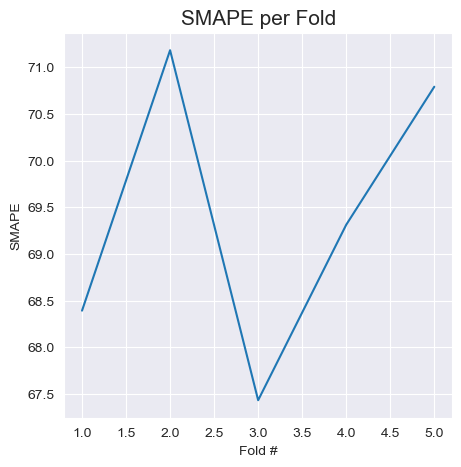

In [48]:
supplemental_dict = {}

for index, row in supplemental_clinical_data.iterrows():
    patient_id = row["patient_id"]
    visit_month = row["visit_month"]
    if patient_id not in supplemental_dict:
        supplemental_dict[patient_id] = {}
    supplemental_dict[patient_id][visit_month] = {
           "updrs_1": row["updrs_1"],
           "updrs_2": row["updrs_2"],
           "updrs_3": row["updrs_3"],
           "updrs_4": row["updrs_4"],
    }
    
additional = supplemental_clinical_data.copy()
additional["month_offset"] = 0

for index, row in supplemental_clinical_data.iterrows():
    visit_id = row["visit_id"]
    patient_id = row["patient_id"]
    visit_month = row["visit_month"]
    month_offsets = [6, 12, 24]
    for month_offset in month_offsets:
        new_visit_month = visit_month + month_offset
        if new_visit_month in supplemental_dict[patient_id]:
            new_row = {
                "visit_id": visit_id,
                "visit_month": visit_month,
                "month_offset": month_offset,
                "patient_id": patient_id,
                "updrs_1": supplemental_dict[patient_id][new_visit_month]["updrs_1"],
                "updrs_2": supplemental_dict[patient_id][new_visit_month]["updrs_2"],
                "updrs_3": supplemental_dict[patient_id][new_visit_month]["updrs_3"],
                "updrs_4": supplemental_dict[patient_id][new_visit_month]["updrs_4"],
                "upd23b_clinical_state_on_medication": row["upd23b_clinical_state_on_medication"],
            }
            additional = additional.append(new_row, ignore_index=True)

additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)

features = [
    'visit_month', 'month_offset',
]

train_copy = train.copy()
train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)

n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((train.shape[0], 4))
smape_scores = []

chunk_size = int(len(additional) / n_folds)
additional_chunks = [additional[i:i+chunk_size] for i in range(0, len(additional), chunk_size)]

for fold, (train_index, test_index) in enumerate(skf.split(train_copy, train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(train_copy.iloc[train_index]), pd.DataFrame(train_copy.iloc[test_index])
    y_train, y_valid = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[train_index], train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_train_features = pd.concat([x_train_features, additional_chunks[fold]]).reset_index(drop=True)
    y_train = y_train.append(additional_chunks[fold][["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])
    
    x_valid_features = pd.DataFrame(x_valid[features])

    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,    
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_preds[:, 3] = 0
    train_oof_preds[test_index] = np.rint(oof_preds)

    reshaped_truth = y_valid.to_numpy().reshape(-1, 1)
    new_preds = np.rint(oof_preds)
    reshaped_preds = new_preds.reshape(-1, 1)

    local_smape = smape(reshaped_truth.flatten(), reshaped_preds.flatten())
    smape_scores.append(local_smape)
    print(": SMAPE = {}".format(local_smape))
    
smape_additional = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(": SMAPE = {}".format(smape_additional))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")

### 4. Medication State

-------> Fold 1 <--------
: SMAPE = 66.72134389267916
-------> Fold 2 <--------
: SMAPE = 68.91129491867824
-------> Fold 3 <--------
: SMAPE = 65.62388386161908
-------> Fold 4 <--------
: SMAPE = 67.29632811108861
-------> Fold 5 <--------
: SMAPE = 69.53920784321745
--> Overall results for out of fold predictions
: SMAPE = 67.61841172545651


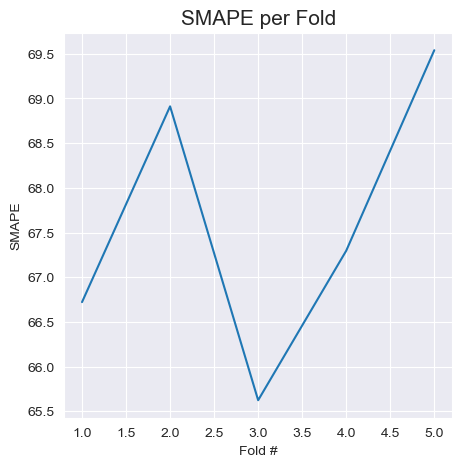

In [49]:
features = [
    'visit_month', 'month_offset', 'med_state',
]

train_copy = train.copy()
train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)

n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((train.shape[0], 4))
smape_scores = []

train_copy["med_state"] = train_copy["upd23b_clinical_state_on_medication"]
train_copy["med_state"] = train_copy["med_state"].apply(lambda x: 0 if x == "Off" else 1 if x == "On" else 2)

for fold, (train_index, test_index) in enumerate(skf.split(train_copy, train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(train_copy.iloc[train_index]), pd.DataFrame(train_copy.iloc[test_index])
    y_train, y_valid = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[train_index], train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,    
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_preds[:, 3] = 0
    train_oof_preds[test_index] = np.rint(oof_preds)

    reshaped_truth = y_valid.to_numpy().reshape(-1, 1)
    new_preds = np.rint(oof_preds)
    reshaped_preds = new_preds.reshape(-1, 1)

    local_smape = smape(reshaped_truth.flatten(), reshaped_preds.flatten())
    smape_scores.append(local_smape)
    print(": SMAPE = {}".format(local_smape))
    
smape_med = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(": SMAPE = {}".format(smape_med))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")

### 5. Protein Data

-------> Fold 1 <--------
: SMAPE = 71.69819753907323
-------> Fold 2 <--------
: SMAPE = 72.34656290610852
-------> Fold 3 <--------
: SMAPE = 66.53572203313085
-------> Fold 4 <--------
: SMAPE = 68.28687817764839
-------> Fold 5 <--------
: SMAPE = 69.70239549375675
--> Overall results for out of fold predictions
: SMAPE = 69.71395122994355


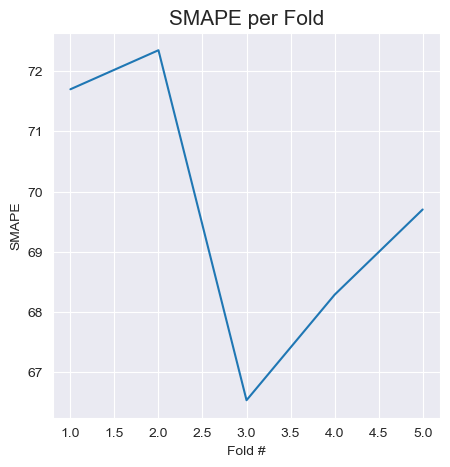

In [50]:
from sklearn.model_selection import GroupKFold

features = [
    "visit_month", "month_offset", "O00391", "O00533", "O00584", "O14498", "O14773", "O14791", "O15240", 
    "O15394", "O43505", "O60888", "O75144", "O75326", "O94919", "P00441", "P00450", "P00734", "P00736", 
    "P00738", "P00746", "P00747", "P00748", "P00751", "P01008", "P01009", "P01011", "P01019", "P01023", 
    "P01024", "P01031", "P01033", "P01034", "P01042", "P01344", "P01591", "P01608", "P01621", "P01717", 
    "P01780", "P01833", "P01834", "P01857", "P01859", "P01860", "P01861", "P01876", "P01877", "P02452", 
    "P02647", "P02649", "P02652", "P02655", "P02656", "P02671", "P02675", "P02679", "P02747", "P02748",
    "P02749", "P02750", "P02751", "P02753", "P02760", "P02763", "P02765", "P02766", "P02768", "P02774",
    "P02787", "P02790", "P04004", "P04075", "P04156", "P04180", "P04196", "P04207", "P04211", "P04216", 
    "P04217", "P04275", "P04406", "P04433", "P05060", "P05067", "P05090", "P05155", "P05156", "P05408", 
    "P05452", "P05546", "P06310", "P06396", "P06454", "P06681", "P06727", "P07195", "P07225", "P07333", 
    "P07339", "P07602", "P07711", "P07858", "P07998", "P08123", "P08133", "P08253", "P08294", "P08493", 
    "P08571", "P08603", "P08637", "P08697", "P09104", "P09486", "P09871", "P10451", "P10643", "P10645", 
    "P10909", "P11142", "P11277", "P12109", "P13473", "P13521", "P13591", "P13611", "P13671", "P13987", 
    "P14174", "P14314", "P14618", "P16035", "P16070", "P16152", "P16870", "P17174", "P17936", "P18065", 
    "P19021", "P19652", "P19823", "P19827", "P20774", "P20933", "P23083", "P23142", "P24592", "P25311", 
    "P27169", "P30086", "P31997", "P35542", "P36222", "P36955", "P36980", "P39060", "P40925", "P41222", 
    "P43121", "P43251", "P43652", "P49588", "P49908", "P51884", "P54289", "P55290", "P61278", "P61626", 
    "P61769", "P61916", "P80748", "P98160", "Q02818", "Q06481", "Q08380", "Q12805", "Q12841", "Q12907", 
    "Q13283", "Q13332", "Q13451", "Q13740", "Q14118", "Q14508", "Q14515", "Q14624", "Q15904", "Q16270",
    "Q16610", "Q562R1", "Q6UX71", "Q6UXB8", "Q6UXD5", "Q7Z3B1", "Q7Z5P9", "Q8IWV7", "Q8N2S1", "Q8NBJ4",
    "Q8NE71", "Q92520", "Q92823", "Q92876", "Q96BZ4", "Q96KN2", "Q96PD5", "Q96S96", "Q99435", "Q99674", 
    "Q99832", "Q99969", "Q9BY67", "Q9HDC9", "Q9NQ79", "Q9NYU2", "Q9UBR2", "Q9UBX5", "Q9UHG2", "Q9UNU6", 
    "Q9Y646", "Q9Y6R7", "P01594", "P02792", "P32754", "P60174", "Q13449", "Q99683", "Q99829", "Q9UKV8"
]

train_copy = train.copy()
train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)

proteins = train_protiens["UniProt"].unique()

protein_visit_dict = {}
for protein in proteins:
    if protein not in protein_visit_dict:
        protein_visit_dict[protein] = {}
    for index, row in train_protiens[(train_protiens["UniProt"] == protein)].iterrows():
        visit_id = row["visit_id"]
        protein_visit_dict[protein][visit_id] = row["NPX"]
        
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(
           lambda visit_id: protein_visit_dict[protein][visit_id] if visit_id in protein_visit_dict[protein] else 0
    )

n_folds = 5
skf = GroupKFold(n_splits=n_folds)
train_oof_preds = np.zeros((train.shape[0], 4))
smape_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(train_copy, train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]], groups=train_copy["patient_id"])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(train_copy.iloc[train_index]), pd.DataFrame(train_copy.iloc[test_index])
    y_train, y_valid = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[train_index], train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,    
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_preds[:, 3] = 0
    train_oof_preds[test_index] = np.rint(oof_preds)

    reshaped_truth = y_valid.to_numpy().reshape(-1, 1)
    new_preds = np.rint(oof_preds)
    reshaped_preds = new_preds.reshape(-1, 1)

    local_smape = smape(reshaped_truth.flatten(), reshaped_preds.flatten())
    smape_scores.append(local_smape)
    print(": SMAPE = {}".format(local_smape))
    
smape_protein = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(": SMAPE = {}".format(smape_protein))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")

### Model Comparisons

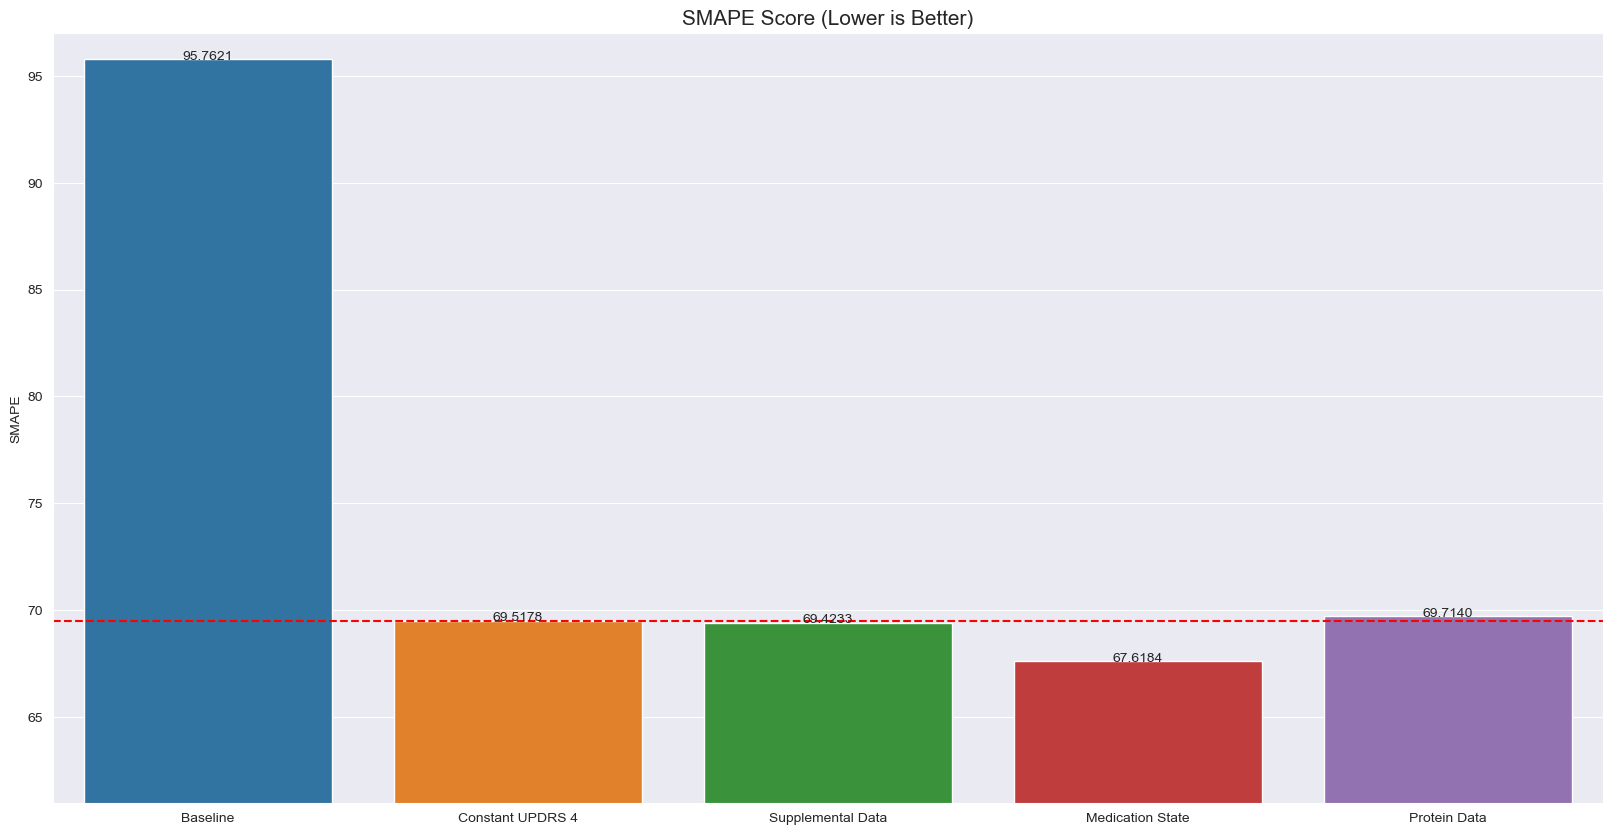

In [51]:
bar, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(
    x=["Baseline", "Constant UPDRS 4", "Supplemental Data", "Medication State", "Protein Data"],
    y=[
        smape_baseline,
        smape_updrs40,
        smape_additional,
        smape_med,
        smape_protein,
    ]
)
_ = ax.axhline(y=69.51, color='r', linestyle='--')
_ = ax.set_title("SMAPE Score (Lower is Better)", fontsize=15)
_ = ax.set_xlabel("")
_ = ax.set_ylabel("SMAPE")
_ = ax.set_ylim([61, 97])
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:.4f}".format(height), ha="center")